In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np

In [2]:
diagnosis_data = pd.read_csv("data/patient-discharge-data-by-principal-diagnosis.csv")

In [3]:
diagnosis_data.head()

Year  OSHPD ID     Facility Name Type of Control County Name  \
0  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
1  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
2  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
3  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
4  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   

    Principal Diagnosis Group  Count  
0                  Infections    243  
1                   Neoplasms     68  
2        Endocrine/Metabolism     99  
3  Blood/Blood-forming Organs     54  
4        Psychoses & Neurosis     33

In [4]:
diagnosis_data.describe()

Year       OSHPD ID         Count
count  40731.000000   40731.000000  40731.000000
mean    2011.489848  281218.986251    571.990057
std        1.713657  135949.175171    890.239564
min     2009.000000   10735.000000      1.000000
25%     2010.000000  190382.000000     48.000000
50%     2011.000000  301155.000000    227.000000
75%     2013.000000  370977.000000    711.000000
max     2014.000000  580996.000000  10560.000000

In [5]:
#oldest year in data
min(diagnosis_data.Year)

2009

In [6]:
#most recent year in data
max(diagnosis_data.Year)

2014

In [7]:
#number of different IDs
pd.unique(diagnosis_data['OSHPD ID']).size

469

In [8]:
#number of different Facilities
pd.unique(diagnosis_data['Facility Name']).size

571

In [9]:
#number of different Counties
pd.unique(diagnosis_data['County Name']).size

56

In [10]:
#number of different Diagnosis
pd.unique(diagnosis_data['Principal Diagnosis Group']).size

19

In [11]:
#list of different Diagnosis
pd.unique(diagnosis_data['Principal Diagnosis Group'])

array(['Infections', 'Neoplasms', 'Endocrine/Metabolism',
       'Blood/Blood-forming Organs', 'Psychoses & Neurosis',
       'Nervous & Sensory Systems', 'Circulatory', 'Respiratory',
       'Digestive', 'Genitourinary', 'All Pregnancies', 'Skin Disorders',
       'Musculoskeletal', 'Congenital Anomalies (Birth Defects)',
       'Symptoms', 'Injuries/Drugs/Complications',
       'Other Reasons for Health Services', 'Perinatal Disorders',
       'Births'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32582b2ed0>,
      dtype=object)

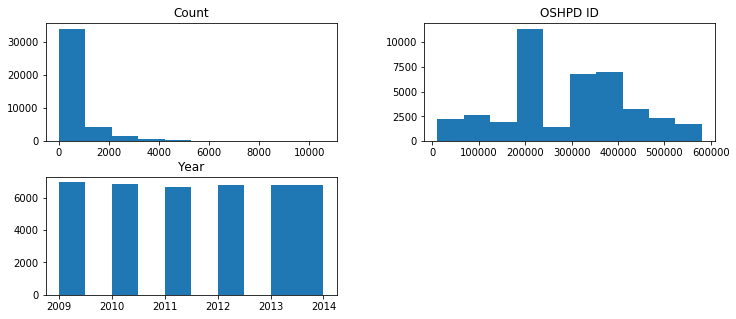

In [12]:
diagnosis_data.hist(figsize=(12, 5), grid=False)

In [13]:
#total number of entries that have null value
diagnosis_data.isnull().sum()

Year                         0
OSHPD ID                     0
Facility Name                0
Type of Control              0
County Name                  0
Principal Diagnosis Group    0
Count                        0
dtype: int64

In [14]:
diagnosis_data

Year  OSHPD ID                     Facility Name Type of Control  \
0      2009     10735                  ALAMEDA HOSPITAL        District   
1      2009     10735                  ALAMEDA HOSPITAL        District   
2      2009     10735                  ALAMEDA HOSPITAL        District   
3      2009     10735                  ALAMEDA HOSPITAL        District   
4      2009     10735                  ALAMEDA HOSPITAL        District   
...     ...       ...                               ...             ...   
40726  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40727  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40728  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40729  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40730  2014     94002  TELECARE EL DORADO COUNTY P.H.F.        Investor   

      County Name          Principal Diagnosis Group  Count  
0         ALAMEDA                         Infections    243  
1         ALAMEDA                          Neoplasms     68  
2         ALAMEDA               Endocrine/Metabolism     99  
3         ALAMEDA         Blood/Blood-forming Organs     54  
4         ALAMEDA               Psychoses & Neurosis     33  
...           ...                                ...    ...  
40726   EL DORADO                           Symptoms     84  
40727   EL DORADO       Injuries/Drugs/Complications    378  
40728   EL DORADO  Other Reasons for Health Services    349  
40729   EL DORADO                             Births    509  
40730   EL DORADO               Psychoses & Neurosis    475  

[40731 rows x 7 columns]

In [15]:
diagnosis_data.groupby("OSHPD ID").count()

Year  Facility Name  Type of Control  County Name  \
OSHPD ID                                                      
10735      100            100              100          100   
10739      114            114              114          114   
10776      108            108              108          108   
10782        6              6                6            6   
10805       76             76               76           76   
...        ...            ...              ...          ...   
560838      16             16               16           16   
564121      54             54               54           54   
571086     113            113              113          113   
574010     112            112              112          112   
580996     112            112              112          112   

          Principal Diagnosis Group  Count  
OSHPD ID                                    
10735                           100    100  
10739                           114    114  
10776                           108    108  
10782                             6      6  
10805                            76     76  
...                             ...    ...  
560838                           16     16  
564121                           54     54  
571086                          113    113  
574010                          112    112  
580996                          112    112  

[469 rows x 6 columns]

In [16]:
building_data = pd.read_csv("data/Hospital_Building_Data.csv")

In [17]:
building_data.groupby("Facility Name").count()

County Code  Perm ID  City  \
Facility Name                                                                   
AHMC Anaheim Regional Medical Center                        15       15    15   
Adventist Health And Rideout                                17       17    17   
Adventist Health Bakersfield                                 7        7     7   
Adventist Health Bakersfield - West Side Hospital            4        4     0   
Adventist Health Clearlake                                   6        6     6   
...                                                        ...      ...   ...   
West Anaheim Medical Center                                  5        5     5   
West Covina Medical Center                                   4        4     4   
West Hills Hospital & Medical Center                         4        4     4   
Whittier Hospital Medical Center                             8        8     8   
Woodland Memorial Hospital                                   6        6     6   

                                                   Building Nbr  \
Facility Name                                                     
AHMC Anaheim Regional Medical Center                         15   
Adventist Health And Rideout                                 17   
Adventist Health Bakersfield                                  7   
Adventist Health Bakersfield - West Side Hospital             4   
Adventist Health Clearlake                                    6   
...                                                         ...   
West Anaheim Medical Center                                   5   
West Covina Medical Center                                    4   
West Hills Hospital & Medical Center                          4   
Whittier Hospital Medical Center                              8   
Woodland Memorial Hospital                                    6   

                                                   Building Name  \
Facility Name                                                      
AHMC Anaheim Regional Medical Center                          15   
Adventist Health And Rideout                                  17   
Adventist Health Bakersfield                                   7   
Adventist Health Bakersfield - West Side Hospital              4   
Adventist Health Clearlake                                     6   
...                                                          ...   
West Anaheim Medical Center                                    5   
West Covina Medical Center                                     4   
West Hills Hospital & Medical Center                           4   
Whittier Hospital Medical Center                               8   
Woodland Memorial Hospital                                     6   

                                                   Building Status  \
Facility Name                                                        
AHMC Anaheim Regional Medical Center                            15   
Adventist Health And Rideout                                    17   
Adventist Health Bakersfield                                     7   
Adventist Health Bakersfield - West Side Hospital                4   
Adventist Health Clearlake                                       6   
...                                                            ...   
West Anaheim Medical Center                                      5   
West Covina Medical Center                                       4   
West Hills Hospital & Medical Center                             4   
Whittier Hospital Medical Center                                 8   
Woodland Memorial Hospital                                       6   

                                                   SPC Rating *  Building URL  \
Facility Name                                                                   
AHMC Anaheim Regional Medical Center                         15            15   
Adventist Health And Rideout                                 10            17   
Adven

In [18]:
diagnosis_data["lowercase_facility"] = diagnosis_data["Facility Name"].str.lower()
building_data["lowercase_facility"] = building_data["Facility Name"].str.lower()

In [19]:
building_data.groupby("lowercase_facility")[["lowercase_facility", "Latitude", "Longitude"]].first()

lowercase_facility  \
lowercase_facility                                                                                     
adventist health and rideout                                            adventist health and rideout   
adventist health bakersfield                                            adventist health bakersfield   
adventist health bakersfield - west side hospital  adventist health bakersfield - west side hospital   
adventist health clearlake                                                adventist health clearlake   
adventist health feather river                                        adventist health feather river   
...                                                                                              ...   
west anaheim medical center                                              west anaheim medical center   
west covina medical center                                                west covina medical center   
west hills hospital & medical center                            west hills hospital & medical center   
whittier hospital medical center                                    whittier hospital medical center   
woodland memorial hospital                                                woodland memorial hospital   

                                                    Latitude   Longitude  
lowercase_facility                                                        
adventist health and rideout                       39.138222 -121.594360  
adventist health bakersfield                       35.383377 -119.019699  
adventist health bakersfield - west side hospital  35.375436 -119.092719  
adventist health clearlake                         38.936192 -122.620243  
adventist health feather river                     39.757523 -121.569183  
...                                                      ...         ...  
west anaheim medical center                        33.825577 -117.994919  
west covina medical center                         34.071350 -117.944778  
west hills hospital & medical center               34.203541 -118.629374  
whittier hospital medical center                   33.950382 -118.004646  
woodland memorial hospital                         38.664040 -121.792152  

[415 rows x 3 columns]

In [20]:
diagnosis_with_loc = (diagnosis_data.merge(building_data.groupby("lowercase_facility")[["Latitude", "Longitude"]].first(), left_on='lowercase_facility', right_on='lowercase_facility')
          )
print(diagnosis_with_loc)

       Year  OSHPD ID                         Facility Name Type of Control  \
0      2009     10735                      ALAMEDA HOSPITAL        District   
1      2009     10735                      ALAMEDA HOSPITAL        District   
2      2009     10735                      ALAMEDA HOSPITAL        District   
3      2009     10735                      ALAMEDA HOSPITAL        District   
4      2009     10735                      ALAMEDA HOSPITAL        District   
...     ...       ...                                   ...             ...   
21510  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21511  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21512  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21513  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21514  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   

        County Name          Principal Diagnosis Gr

In [21]:
diagnosis_with_loc.head()

Year  OSHPD ID     Facility Name Type of Control County Name  \
0  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
1  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
2  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
3  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
4  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   

    Principal Diagnosis Group  Count lowercase_facility   Latitude   Longitude  
0                  Infections    243   alameda hospital  37.762657 -122.253899  
1                   Neoplasms     68   alameda hospital  37.762657 -122.253899  
2        Endocrine/Metabolism     99   alameda hospital  37.762657 -122.253899  
3  Blood/Blood-forming Organs     54   alameda hospital  37.762657 -122.253899  
4        Psychoses & Neurosis     33   alameda hospital  37.762657 -122.253899

In [22]:
#list diffiernt type of diagnosis groups
diagnosis_data["Principal Diagnosis Group"].unique()#.groupby("Principal Diagnosis Group").first()

array(['Infections', 'Neoplasms', 'Endocrine/Metabolism',
       'Blood/Blood-forming Organs', 'Psychoses & Neurosis',
       'Nervous & Sensory Systems', 'Circulatory', 'Respiratory',
       'Digestive', 'Genitourinary', 'All Pregnancies', 'Skin Disorders',
       'Musculoskeletal', 'Congenital Anomalies (Birth Defects)',
       'Symptoms', 'Injuries/Drugs/Complications',
       'Other Reasons for Health Services', 'Perinatal Disorders',
       'Births'], dtype=object)

In [23]:

group = diagnosis_data.groupby(["Year", "Facility Name"])

In [24]:
#count column shows total number of diagnosis from hospital that year
group.sum()

OSHPD ID  Count
Year Facility Name                                               
2009 AHMC ANAHEIM REGIONAL MEDICAL CENTER          5720862  14478
     ALAMEDA CO MED CTR - HIGHLAND CAMPUS           206074  14731
     ALAMEDA HOSPITAL                               182495   2842
     ALHAMBRA HOSPITAL                             3230289   3881
     ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS    204041  25190
...                                                    ...    ...
2014 WEST ANAHEIM MEDICAL CENTER                   5123443   5910
     WEST HILLS HOSPITAL AND MEDICAL CENTER        3626321   9284
     WHITE MEMORIAL MEDICAL CENTER                 3626682  23242
     WHITTIER HOSPITAL MEDICAL CENTER              3626777  12492
     WOODLAND MEMORIAL HOSPITAL                   10850634   4825

[2651 rows x 2 columns]

In [25]:
patient_df = pd.read_csv("data/2012-patient-discharge-DATA-ONLY.csv")

In [26]:
patient_df.filter(regex='TOC',axis=1).head()

TOC_Acute  TOC_SN_IC  TOC_Psych  TOC_Chem_Dep  TOC_Rehab  TOC_Unknown
0    12137.0      190.0     2986.0           NaN      465.0          NaN
1        NaN        NaN      683.0           NaN        NaN          NaN
2     9514.0        NaN      777.0           NaN        NaN          NaN
3        NaN        NaN      398.0           NaN        NaN          NaN
4        NaN        NaN      684.0           NaN        NaN          NaN

In [27]:
patient_df.head()

FacilityNum  oshpd_id                         FACILITY NAME  \
0    106010846     10846         ALAMEDA COUNTY MEDICAL CENTER   
1    106044006     44006                      BUTTE COUNTY PHF   
2    106070924     70924  CONTRA COSTA REGIONAL MEDICAL CENTER   
3    106094002     94002                EL DORADO COUNTY P H F   
4    106124004    124004                   SEMPERVIRENS P.H.F.   

            DBA_ADDRESS1     DBA_CITY  DBA_ZIP_CODE   COUNTY NAME  \
0  1411 EAST 31ST STREET      OAKLAND         94602       ALAMEDA   
1   592 RIO LINDO AVENUE        CHICO         95926         BUTTE   
2   2500 ALHAMBRA AVENUE     MARTINEZ         94553  CONTRA COSTA   
3    935-B SPRING STREET  PLACERVILLE         95667     EL DORADO   
4        720 WOOD STREET       EUREKA         95501      HUMBOLDT   

  LICENSED BED SIZE ASSEMBLY DISTRICT SENATE DISTRICT  ...  \
0           300-499       District 18      District 9  ...   
1              1-49        District 3      District 4  ...   
2           150-199       District 14      District 3  ...   
3              1-49        District 5      District 1  ...   
4              1-49        District 2      District 2  ...   

  EC_Submersion_Suffocation_Foreig EC_Other_Accidents  \
0                             14.0              143.0   
1                              NaN                NaN   
2                              9.0               97.0   
3                              NaN                NaN   
4                              NaN                NaN   

   EC_Adverse_Effects_of_Drugs  EC_Self_Inflicted  EC_Inflicted_by_Others  \
0                        500.0               66.0                   507.0   
1                          NaN                NaN                     NaN   
2                        379.0               51.0                    35.0   
3                          NaN                NaN                     NaN   
4                          NaN                NaN                     NaN   

   EC_Undetermined  EC_War  EC_Late_Effects_of_Injury  EC_None  Dsch_Days  
0             16.0     NaN                      209.0    12633     123943  
1              NaN     NaN                        NaN      683       4484  
2             20.0     NaN                       36.0     8995      45257  
3              NaN     NaN                        NaN      398       3035  
4              NaN     NaN                        NaN      684       3372  

[5 rows x 138 columns]

In [28]:
list(patient_df.columns)

['FacilityNum',
 'oshpd_id',
 'FACILITY NAME',
 'DBA_ADDRESS1',
 'DBA_CITY',
 'DBA_ZIP_CODE',
 'COUNTY NAME',
 'LICENSED BED SIZE',
 'ASSEMBLY DISTRICT',
 'SENATE DISTRICT',
 'TYPE CONTROL',
 'TEACHING/RURAL',
 'TOC_Acute',
 'TOC_SN_IC',
 'TOC_Psych',
 'TOC_Chem_Dep',
 'TOC_Rehab',
 'TOC_Unknown',
 'Sex_Male',
 'Sex_Female',
 'Sex_Other',
 'Sex_Unknown',
 'Age_Under_1',
 'Age_01_09',
 'Age_10_19',
 'Age_20_29',
 'Age_30_39',
 'Age_40_49',
 'Age_50_59',
 'Age_60_69',
 'Age_70_79',
 'Age_80_',
 'Age_Unknown',
 'RaceGrp_White',
 'RaceGrp_Black',
 'RaceGrp_Hispanic',
 'RaceGrp_Asian',
 'RaceGrp_Native_Am',
 'RaceGrp_Other',
 'RaceGrp_Unknown',
 'Admt_Home',
 'Admt_Resid_Care',
 'Admt_Ambul_Surgery',
 'Admt_SN_IC',
 'Admt_Acute_Inpt_Hosp_Care',
 'Admt_Other_Inpt_Hosp_Care',
 'Admt_Newborn',
 'Admt_Prison_Jail',
 'Admt_Other',
 'Admt_Unknown',
 'Route_Your_ER',
 'Route_Not_Your_ER',
 'Route_Unknown',
 'Adm_Scheduled',
 'Adm_Unscheduled',
 'Adm_Infant_LT_24_hrs',
 'Adm_Unknown',
 'Disp_Routin

In [29]:
#retreive diagnosis from 2009
diagnosis_data[diagnosis_data["Year"]==2009]

Year  OSHPD ID              Facility Name Type of Control County Name  \
0     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
1     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
2     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
3     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
4     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
...    ...       ...                        ...             ...         ...   
6936  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6937  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6938  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6939  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6940  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   

                 Principal Diagnosis Group  Count         lowercase_facility  
0                               Infections    243           alameda hospital  
1                                Neoplasms     68           alameda hospital  
2                     Endocrine/Metabolism     99           alameda hospital  
3               Blood/Blood-forming Organs     54           alameda hospital  
4                     Psychoses & Neurosis     33           alameda hospital  
...                                    ...    ...                        ...  
6936                       Musculoskeletal    146  rideout memorial hospital  
6937  Congenital Anomalies (Birth Defects)      5  rideout memorial hospital  
6938                              Symptoms    755  rideout memorial hospital  
6939          Injuries/Drugs/Complications    713  rideout memorial hospital  
6940     Other Reasons for Health Services     34  rideout memorial hospital  

[6941 rows x 8 columns]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 384 artists>

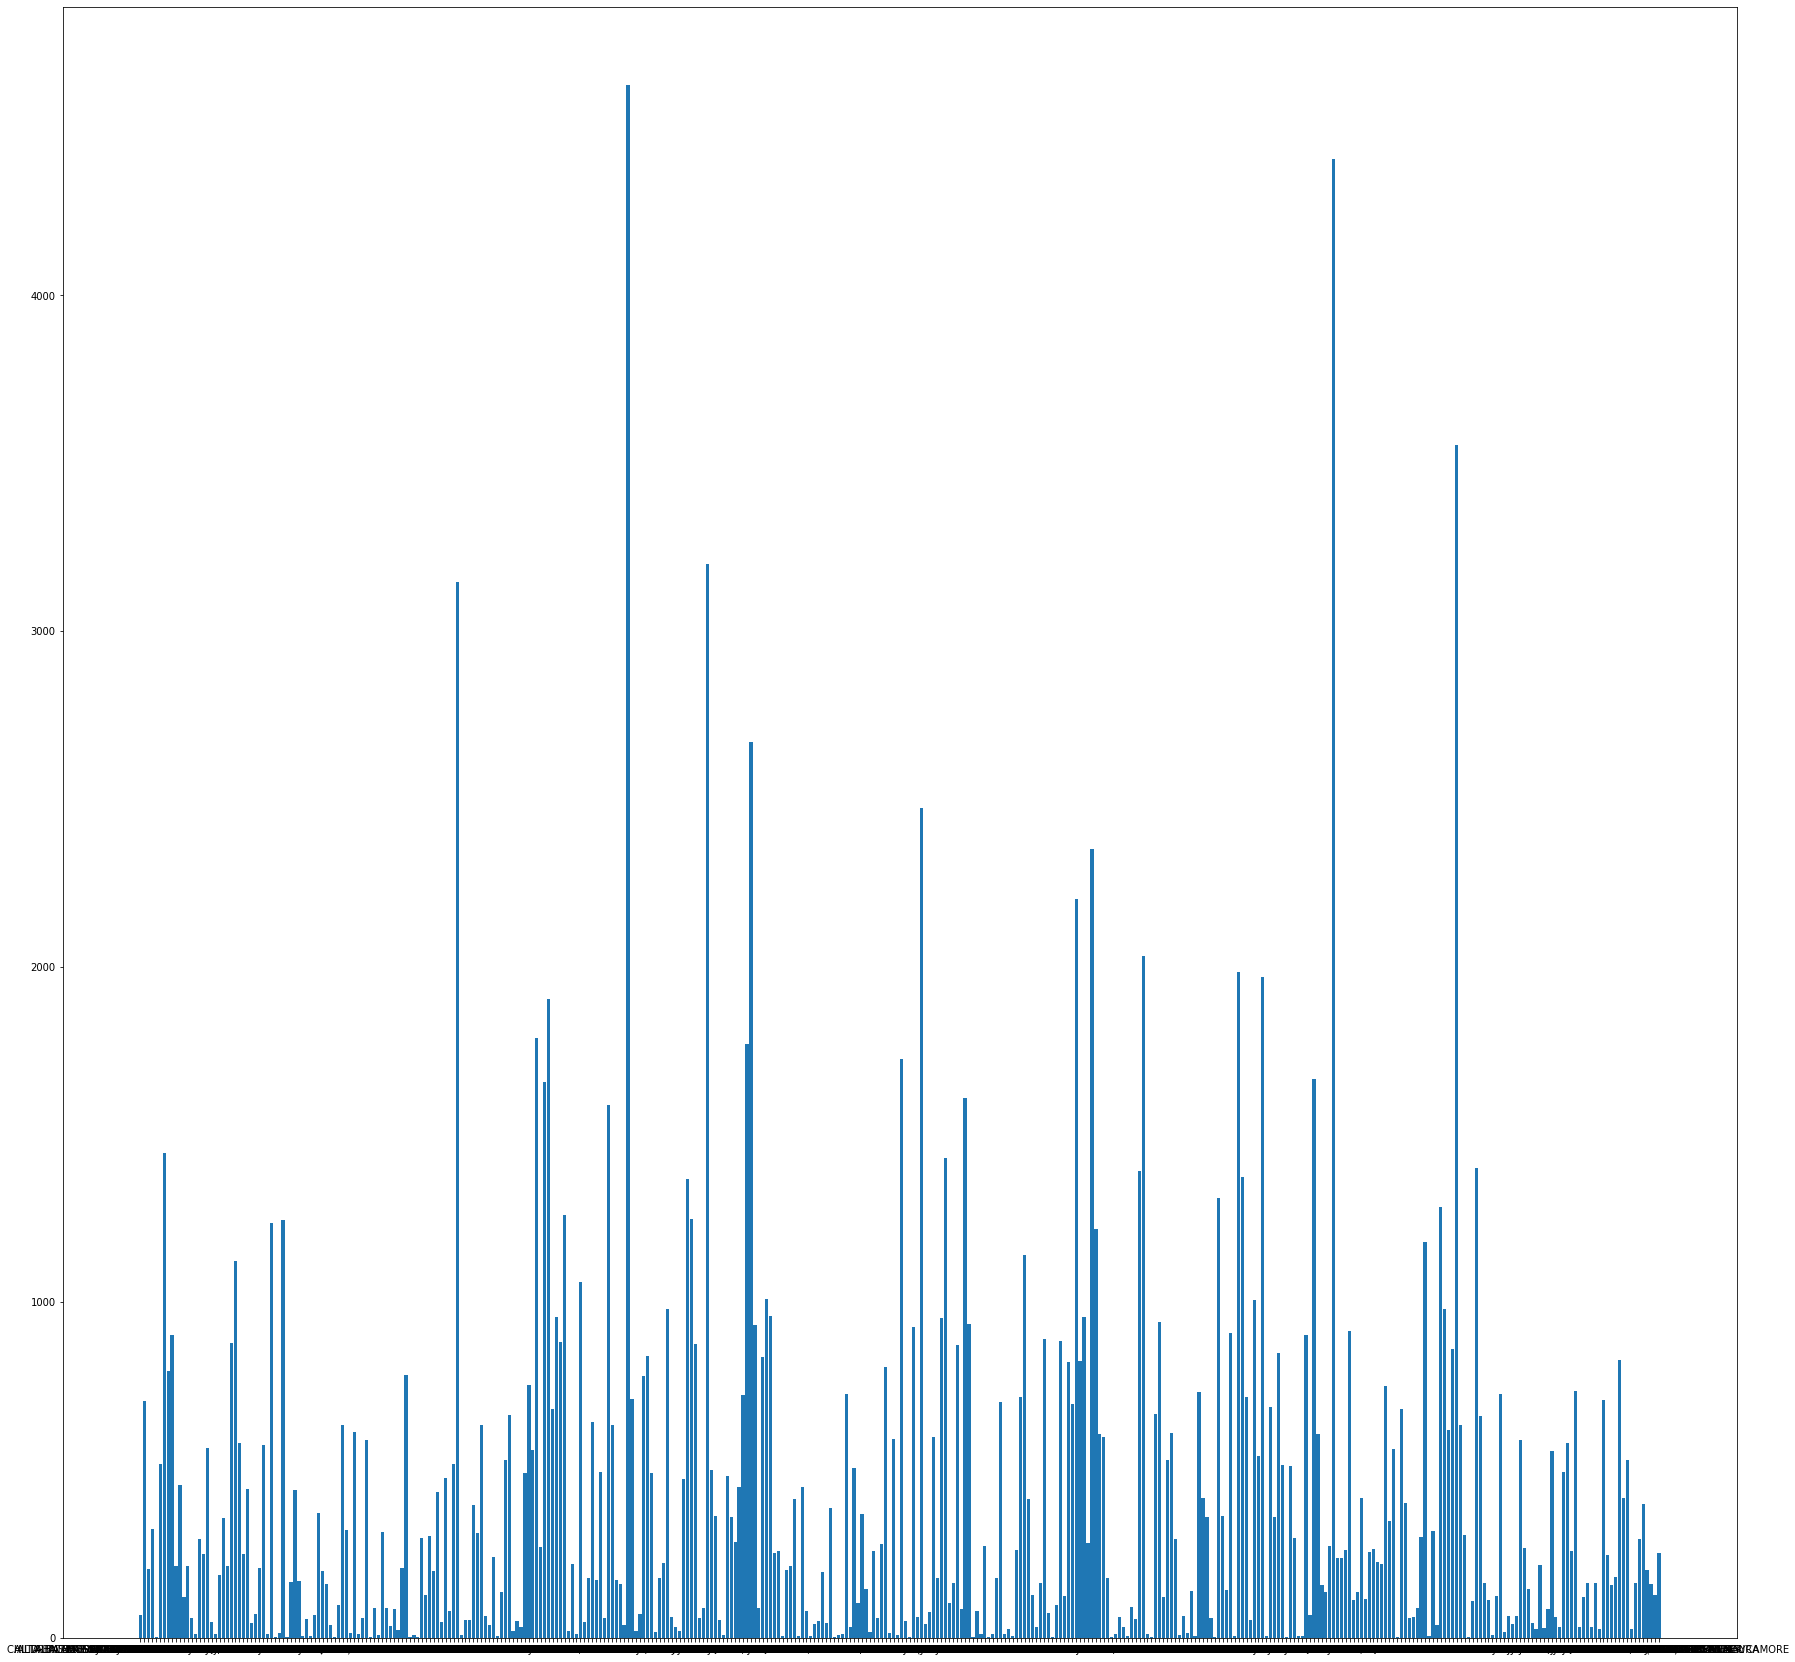

In [30]:
fig,ax = plt.subplots(figsize=[30,30])
filtered = diagnosis_data[diagnosis_data["Year"]==2009][diagnosis_data["Principal Diagnosis Group"]=="Neoplasms"]
ax.bar(filtered["Facility Name"], filtered["Count"])

In [40]:

def divide_two_cols(df_sub):
    df_sub['normalized_count'] = df_sub['Count'] / float(df_sub['Count'].sum())
    return df_sub

filtered = diagnosis_with_loc.groupby(['Year','Facility Name']).apply(divide_two_cols)
filtered

Year  OSHPD ID                         Facility Name Type of Control  \
0      2009     10735                      ALAMEDA HOSPITAL        District   
1      2009     10735                      ALAMEDA HOSPITAL        District   
2      2009     10735                      ALAMEDA HOSPITAL        District   
3      2009     10735                      ALAMEDA HOSPITAL        District   
4      2009     10735                      ALAMEDA HOSPITAL        District   
...     ...       ...                                   ...             ...   
21510  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21511  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21512  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21513  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21514  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   

        County Name          Principal Diagnosis Group  Count  \
0           ALAMEDA                         Infections    243   
1           ALAMEDA                          Neoplasms     68   
2           ALAMEDA               Endocrine/Metabolism     99   
3           ALAMEDA         Blood/Blood-forming Organs     54   
4           ALAMEDA               Psychoses & Neurosis     33   
...             ...                                ...    ...   
21510  CONTRA COSTA                Perinatal Disorders     47   
21511  CONTRA COSTA                           Symptoms    103   
21512  CONTRA COSTA       Injuries/Drugs/Complications    450   
21513  CONTRA COSTA  Other Reasons for Health Services     23   
21514  CONTRA COSTA                             Births   1564   

                         lowercase_facility   Latitude   Longitude  \
0                          alameda hospital  37.762657 -122.253899   
1                          alameda hospital  37.762657 -122.253899   
2                          alameda hospital  37.762657 -122.253899   
3                          alameda hospital  37.762657 -122.253899   
4                          alameda hospital  37.762657 -122.253899   
...                                     ...        ...         ...   
21510  kaiser foundation hospital - antioch  37.951855 -121.776924   
21511  kaiser foundation hospital - antioch  37.951855 -121.776924   
21512  kaiser foundation hospital - antioch  37.951855 -121.776924   
21513  kaiser foundation hospital - antioch  37.951855 -121.776924   
21514  kaiser foundation hospital - antioch  37.951855 -121.776924   

       normalized_count  
0              0.085503  
1              0.023927  
2              0.034835  
3              0.019001  
4              0.011612  
...                 ...  
21510          0.004981  
21511          0.010916  
21512          0.047690  
21513          0.002437  
21514          0.165748  

[21515 rows x 11 columns]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindex

<BarContainer object of 243 artists>

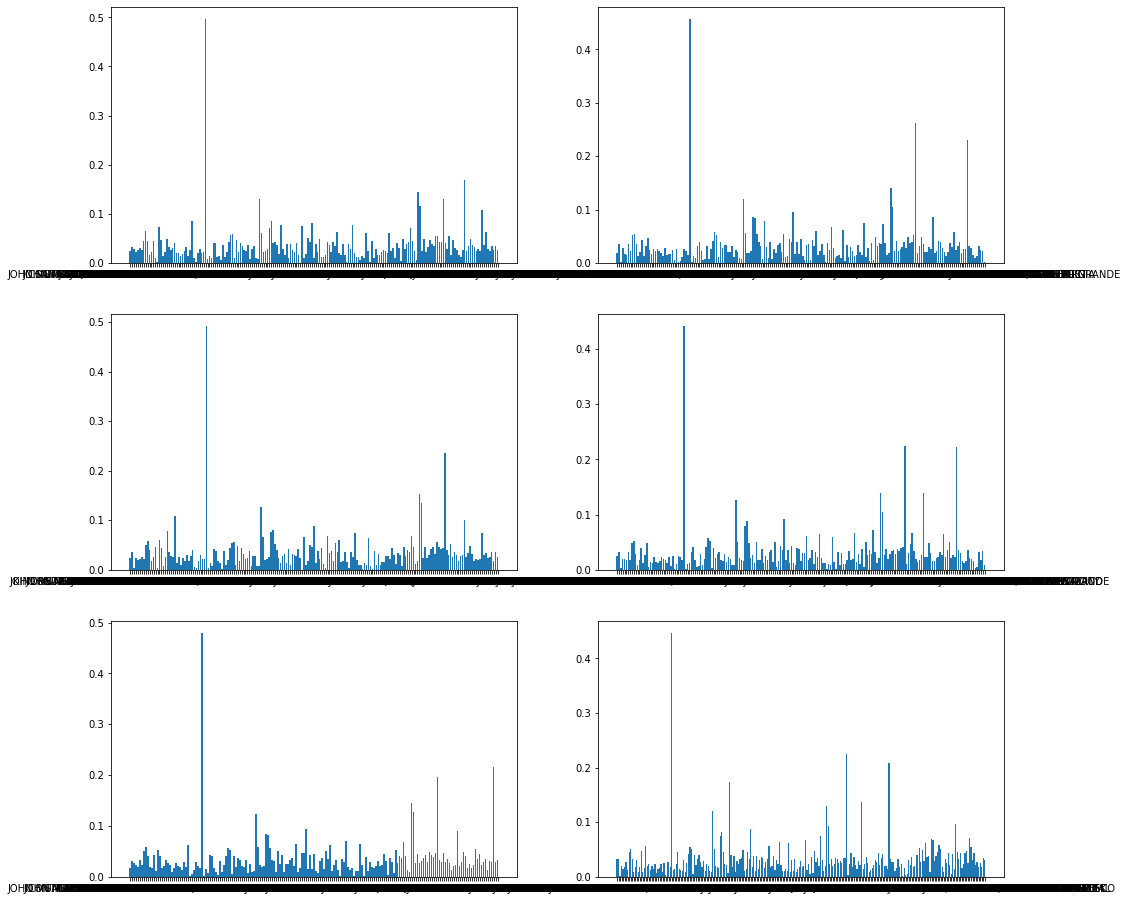

In [32]:
fig,ax = plt.subplots(3,2,figsize=[16,16])
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[0,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2010][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[1,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2011][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[2,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2012][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[0,1].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2013][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[1,1].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2014][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax[2,1].bar(temp["Facility Name"], temp["normalized_count"])

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 189 artists>

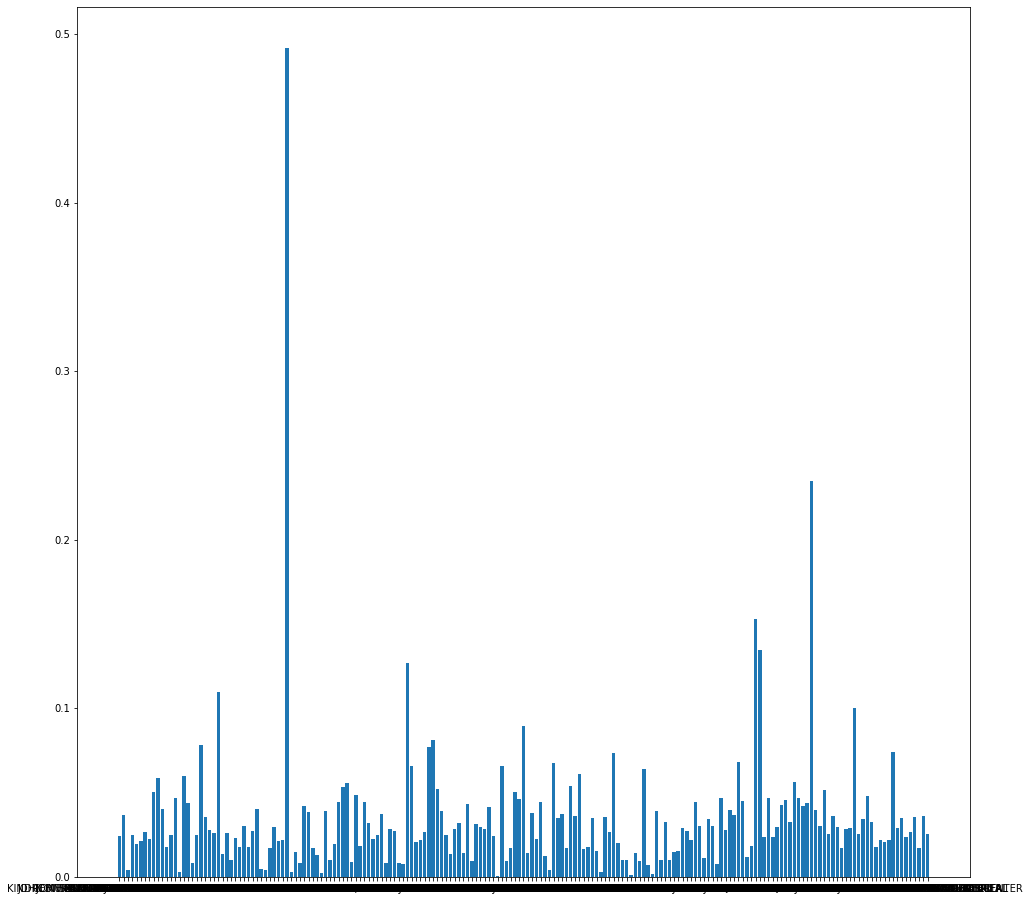

In [33]:
fig,ax = plt.subplots(figsize=[16,16])
temp = filtered[filtered["Year"]==2010][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax.bar(temp["Facility Name"], temp["normalized_count"])

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindex

<BarContainer object of 3 artists>

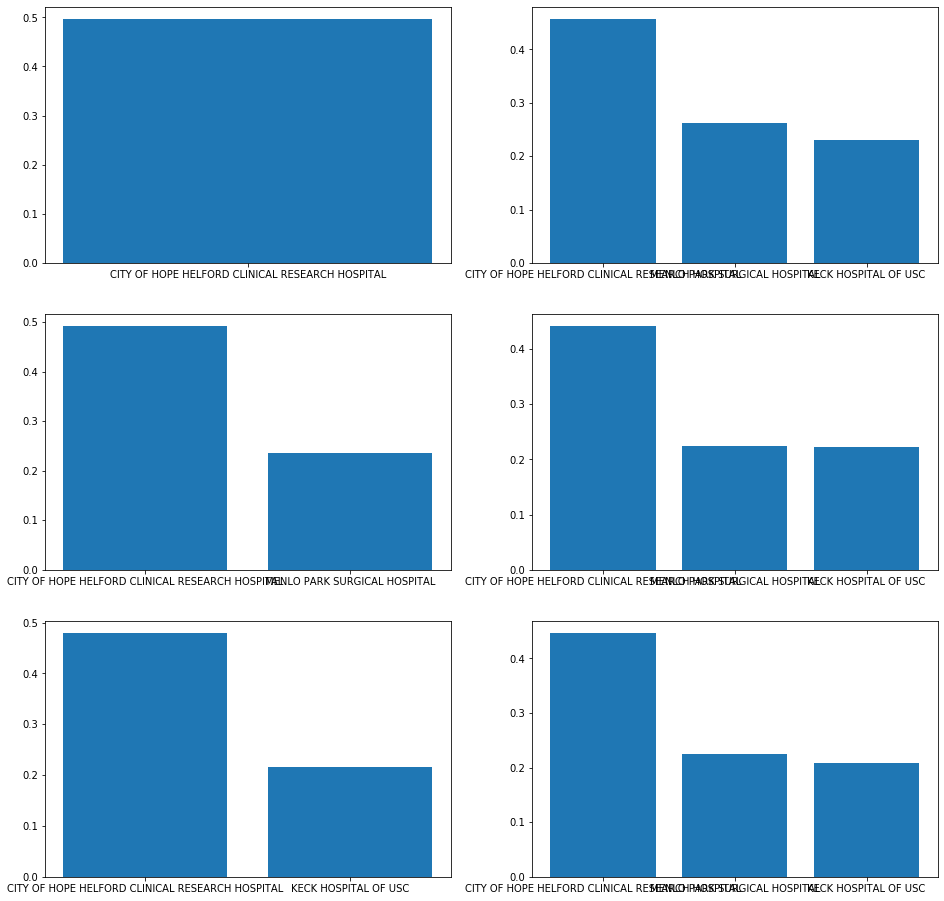

In [34]:
fig,ax = plt.subplots(3,2,figsize=[16,16])
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[0,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2010][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[1,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2011][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[2,0].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2012][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[0,1].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2013][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[1,1].bar(temp["Facility Name"], temp["normalized_count"])
temp = filtered[filtered["Year"]==2014][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
ax[2,1].bar(temp["Facility Name"], temp["normalized_count"])

In [35]:
filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["Year"]==2014][filtered["normalized_count"]>0.2]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                                    Facility Name  \
4035   2014    190176  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
16975  2014    414018                     MENLO PARK SURGICAL HOSPITAL   
19882  2014    194219                             KECK HOSPITAL OF USC   

      Type of Control  County Name Principal Diagnosis Group  Count  \
4035       Non-Profit  LOS ANGELES                 Neoplasms   2635   
16975      Non-Profit    SAN MATEO                 Neoplasms     43   
19882      Non-Profit  LOS ANGELES                 Neoplasms   2475   

                                    lowercase_facility   Latitude   Longitude  \
4035   city of hope helford clinical research hospital  34.127777 -117.972443   
16975                     menlo park surgical hospital  37.462183 -122.159368   
19882                             keck hospital of usc  34.061954 -118.201569   

       normalized_count  
4035           0.446383  
16975          0.225131  
19882          0.207896

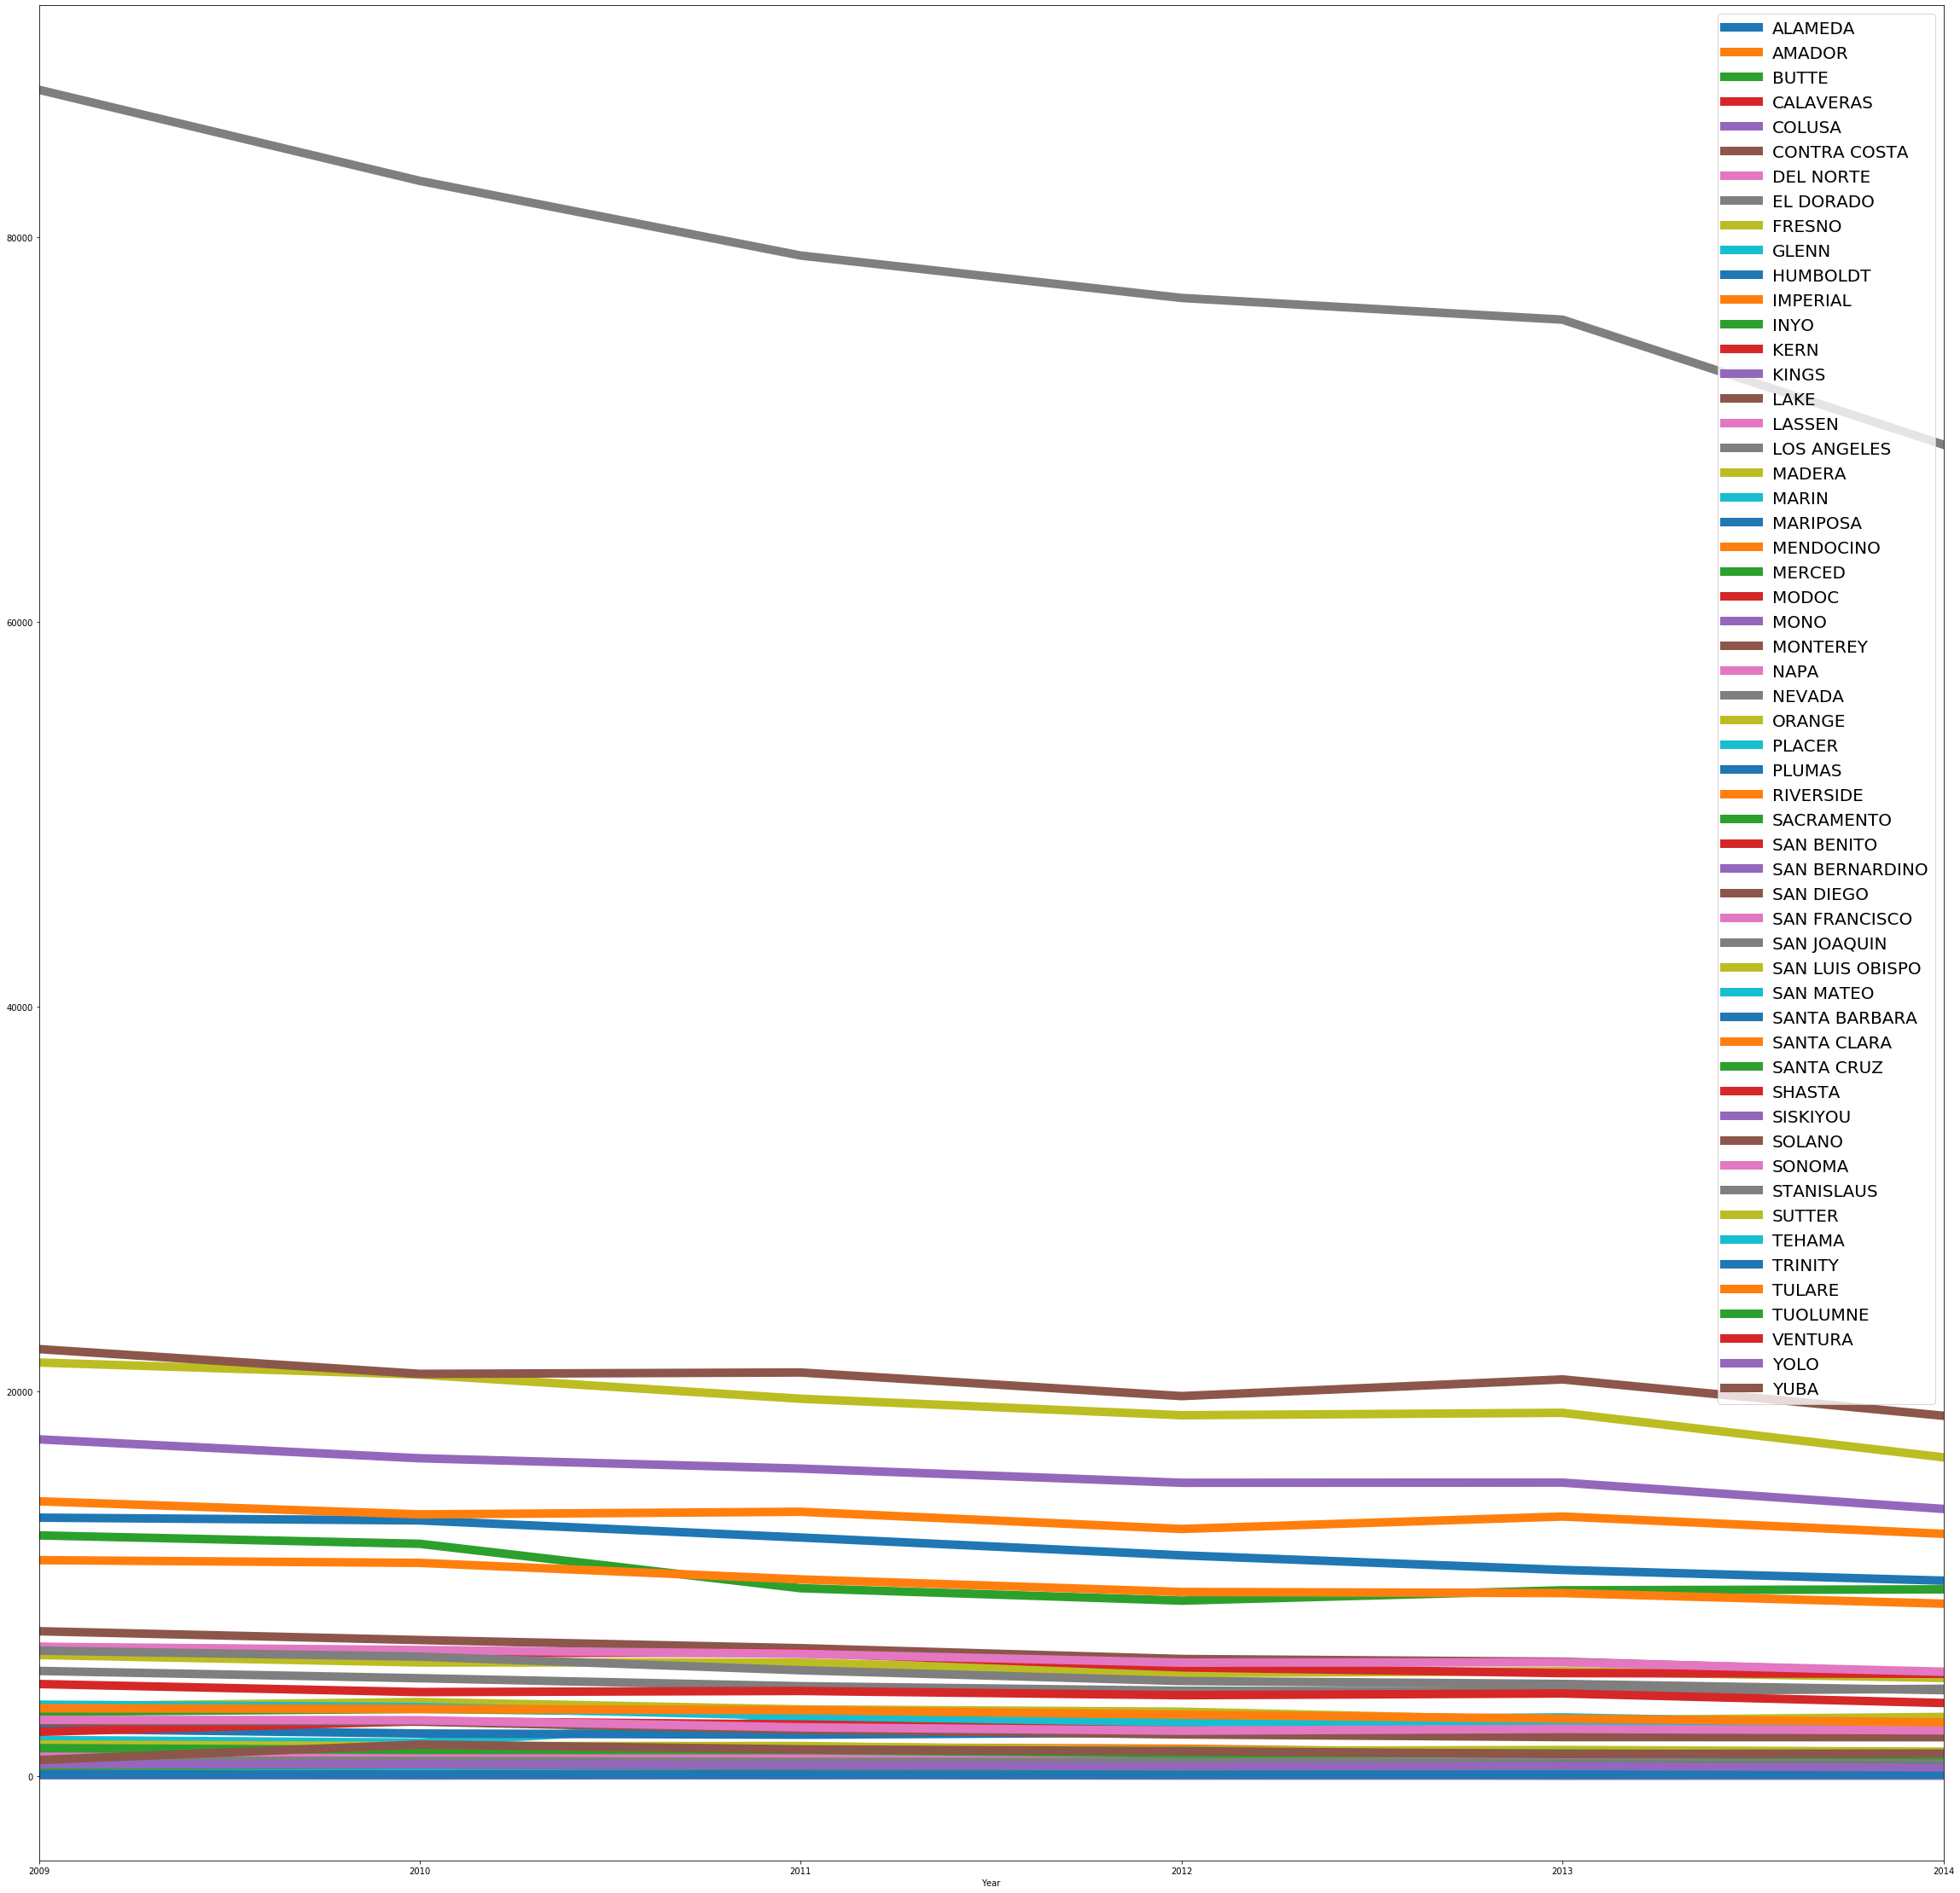

In [36]:
#how has the number of diagnosis of respiratory conditions changes over time for each county
fig,ax = plt.subplots(figsize=[40,40])
temp = diagnosis_data[diagnosis_data["Principal Diagnosis Group"]=="Respiratory"].copy()
temp.groupby(["Year","County Name"]).sum()['Count'].unstack().plot(ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

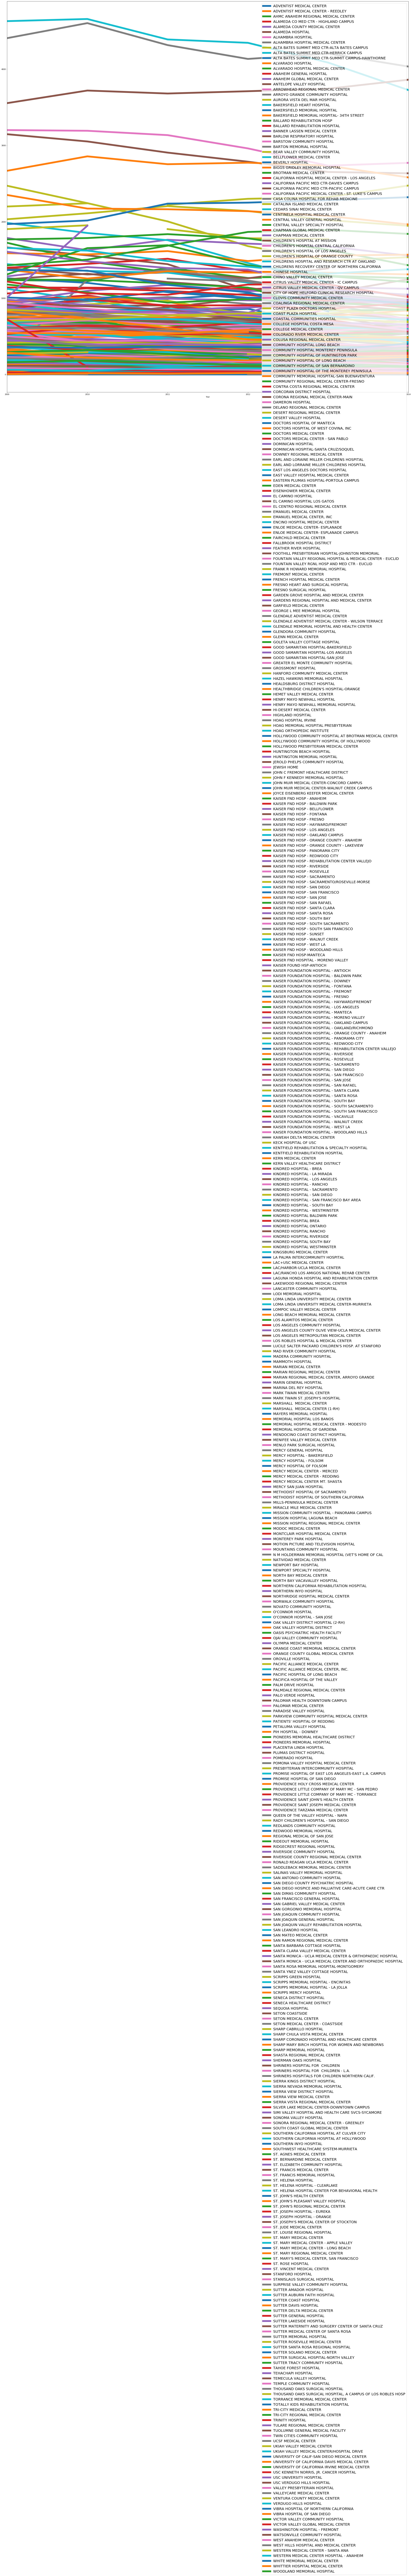

In [39]:
#how has the number of diagnosis of respiratory conditions changes over time for each facility
fig,ax = plt.subplots(figsize=[40,40])
temp = diagnosis_data[diagnosis_data["Principal Diagnosis Group"]=="Neoplasms"].copy()
temp.groupby(["Year","Facility Name"]).sum()['Count'].unstack().plot(ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


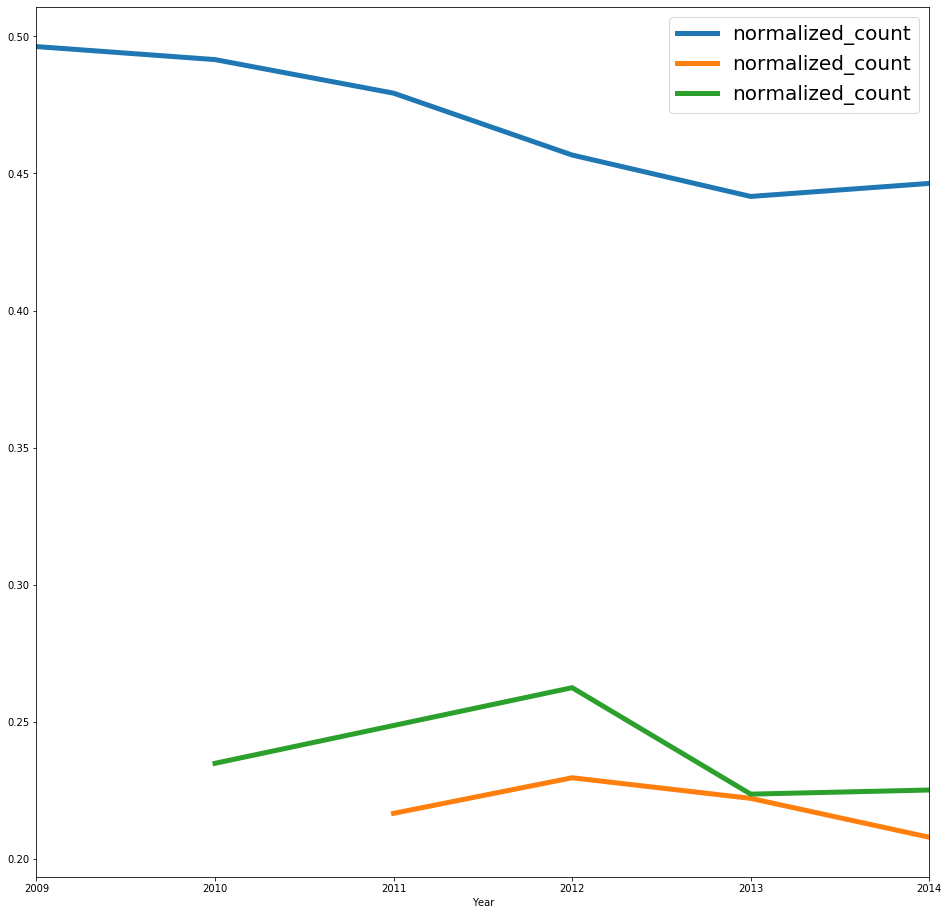

In [41]:
#how has the number of diagnosis of respiratory conditions changes over time for each facility divided by total diagnosis
fig,ax = plt.subplots(figsize=[16,16])

#limit to ALAMEDA county for ease of visual and computation
#create df with new column of counts of diagnosis divided by all counts of that diagnosis for a facility in a given year
#filtered = diagnosis_data.groupby(['Year','Facility Name']).apply(divide_two_cols)
#remove all diagnosis except neoplasms
temp = filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>.2]
temp.groupby("Facility Name").plot(x="Year", y="normalized_count", ax=ax, linewidth=5)
ax.legend(prop={'size': 20})

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


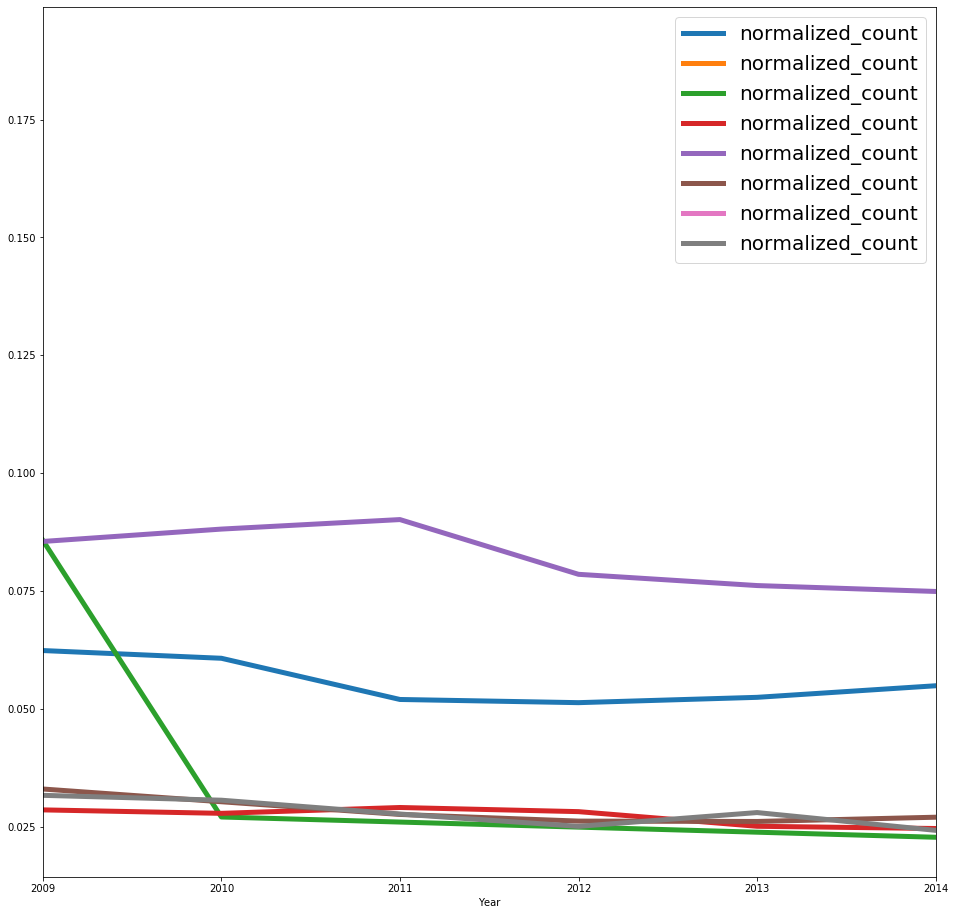

In [42]:
#how has the number of diagnosis of respiratory conditions changes over time for each facility divided by total diagnosis
fig,ax = plt.subplots(figsize=[16,16])

#limit to ALAMEDA county for ease of visual and computation
#create df with new column of counts of diagnosis divided by all counts of that diagnosis for a facility in a given year
#filtered = diagnosis_data.groupby(['Year','Facility Name']).apply(divide_two_cols)
#remove all diagnosis except neoplasms
temp = filtered[filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"][filtered["normalized_count"]>.02]
temp.groupby("Facility Name").plot(x="Year", y="normalized_count", ax=ax, linewidth=5)
ax.legend(prop={'size': 20})

In [43]:
"""
def divide_two_cols(df_sub):
    df_sub['normalized_count'] = df_sub['Count'] / float(df_sub['Count'].sum())
    return df_sub

filtered = diagnosis_with_loc.groupby(['Year','Facility Name']).apply(divide_two_cols)
filtered"""

"\ndef divide_two_cols(df_sub):\n    df_sub['normalized_count'] = df_sub['Count'] / float(df_sub['Count'].sum())\n    return df_sub\n\nfiltered = diagnosis_with_loc.groupby(['Year','Facility Name']).apply(divide_two_cols)\nfiltered"

In [44]:
#confirm that the sum of the normalized values are 1
confirmation = filtered.groupby(["Year", "Facility Name"])["normalized_count"].sum()

In [45]:
confirmation.get(round(confirmation,15) != 1.0)

Series([], Name: normalized_count, dtype: float64)

In [46]:
total_by_diagnosis

NameError: name 'total_by_diagnosis' is not defined

In [47]:
#total num of different diagnosis
total_by_diagnosis = filtered.groupby("Principal Diagnosis Group")["Count"].sum()

In [48]:
all_diagnosis_total = filtered.groupby("Principal Diagnosis Group")["Count"].sum().sum()

In [49]:
normalized_total_diagnosis_rate = total_by_diagnosis / all_diagnosis_total

In [50]:
normalized_total_diagnosis_rate

Principal Diagnosis Group
All Pregnancies                         0.141010
Births                                  0.128218
Blood/Blood-forming Organs              0.010681
Circulatory                             0.118012
Congenital Anomalies (Birth Defects)    0.003923
Digestive                               0.094672
Endocrine/Metabolism                    0.033576
Genitourinary                           0.041661
Infections                              0.051462
Injuries/Drugs/Complications            0.077277
Musculoskeletal                         0.046355
Neoplasms                               0.041199
Nervous & Sensory Systems               0.018968
Other Reasons for Health Services       0.022520
Perinatal Disorders                     0.005455
Psychoses & Neurosis                    0.038680
Respiratory                             0.070854
Skin Disorders                          0.017153
Symptoms                                0.038325
Name: Count, dtype: float64

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<BarContainer object of 191 artists>

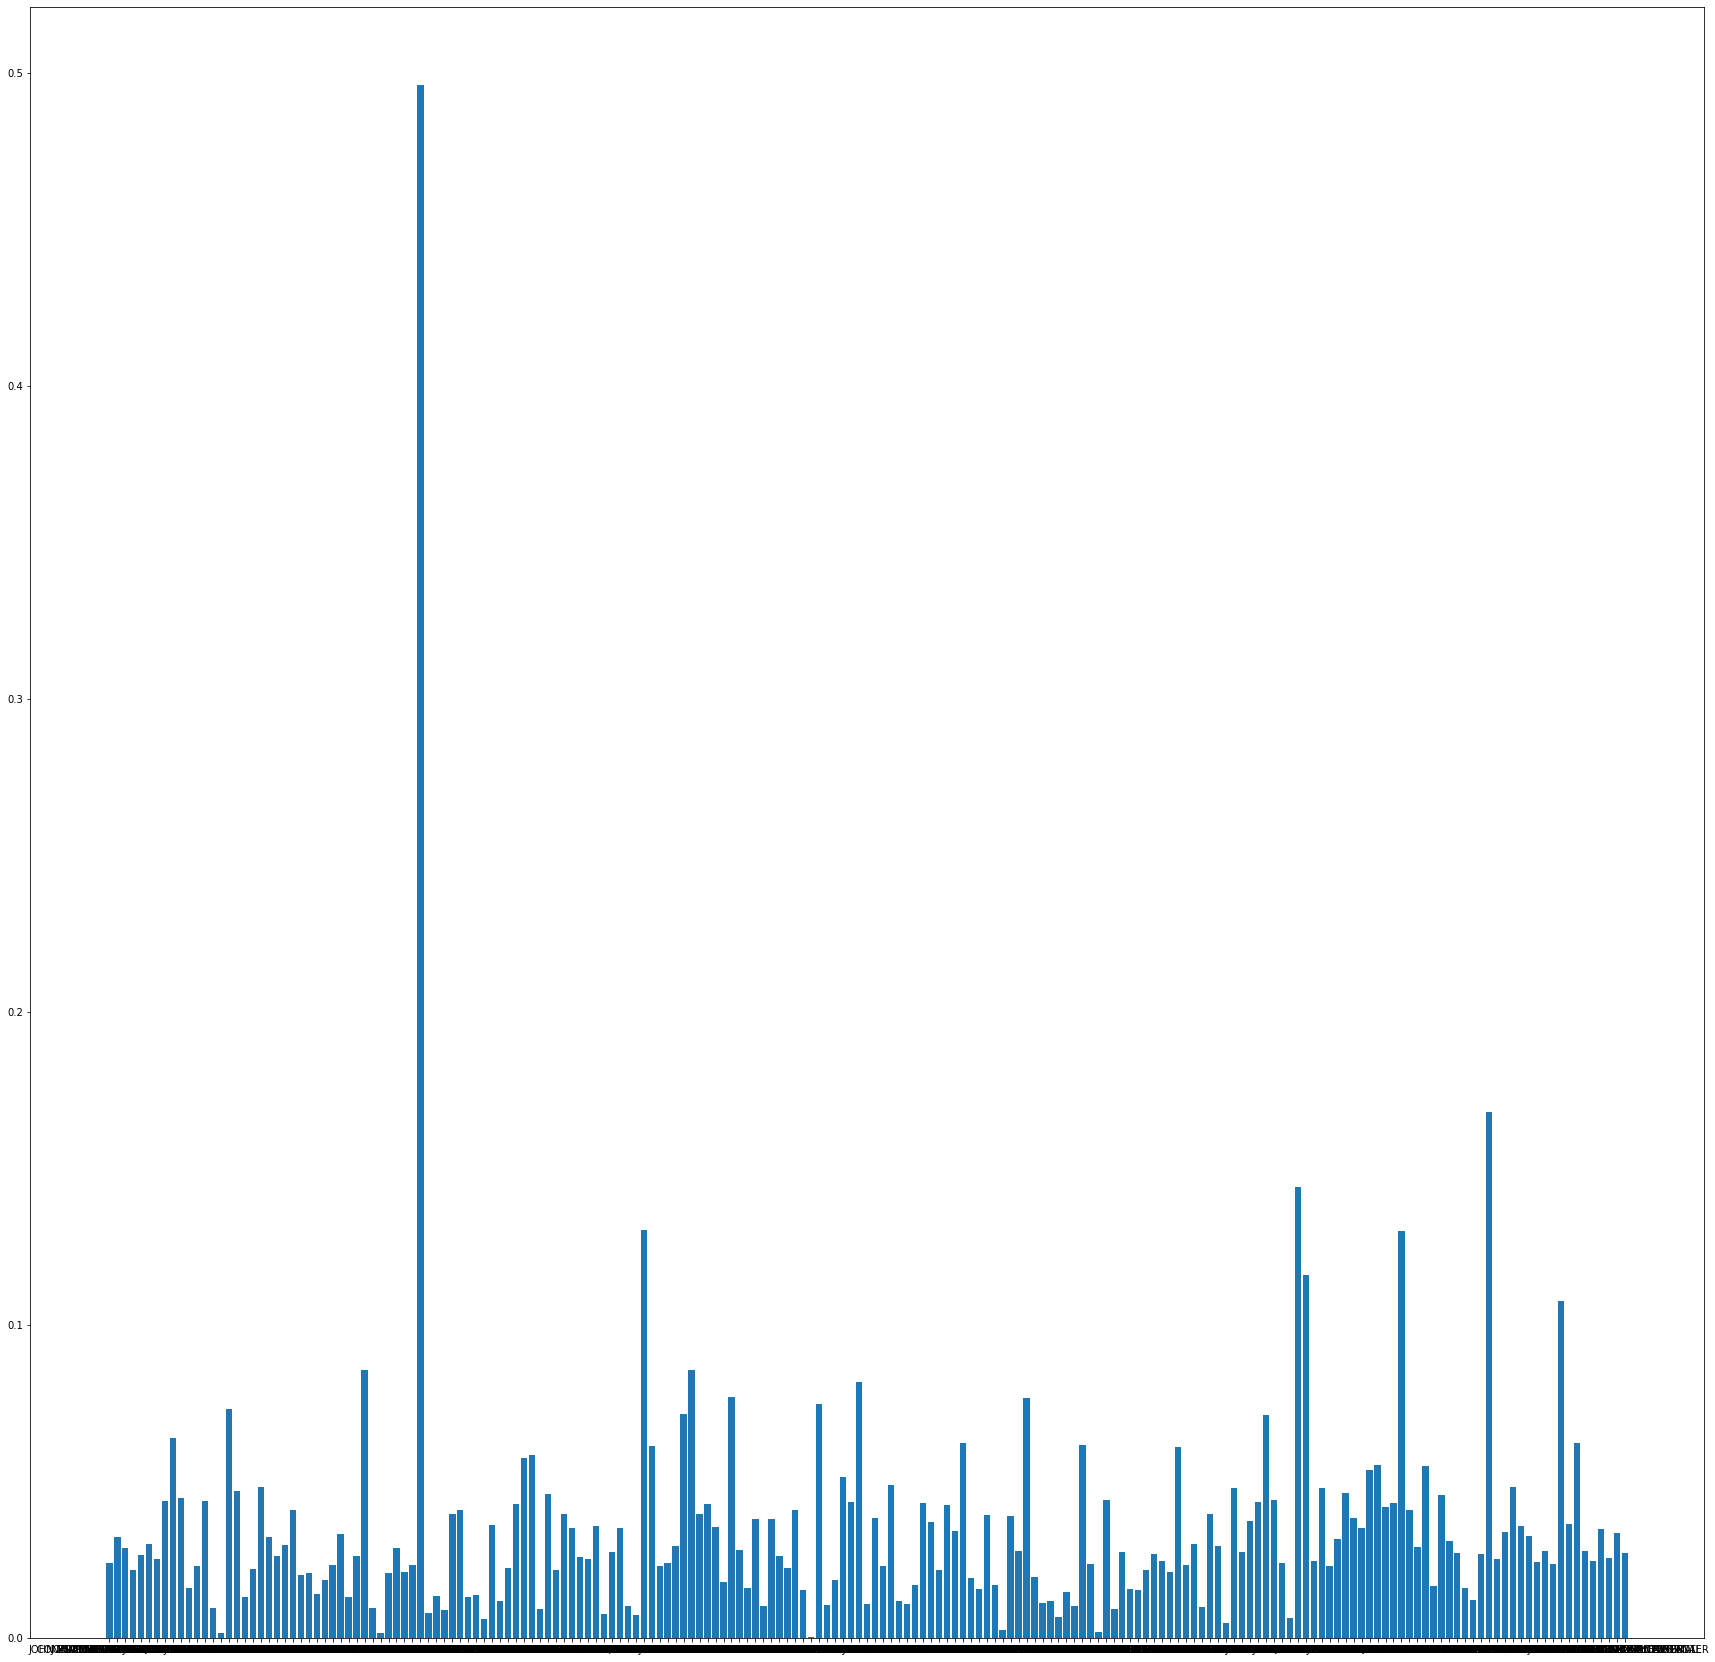

In [51]:
#graph of normalized neoplasm diagnosis
fig,ax = plt.subplots(figsize=[30,30])
temp_norm = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"]
temp_facility = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["Facility Name"]
ax.bar(temp_facility, temp_norm)

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<BarContainer object of 7 artists>

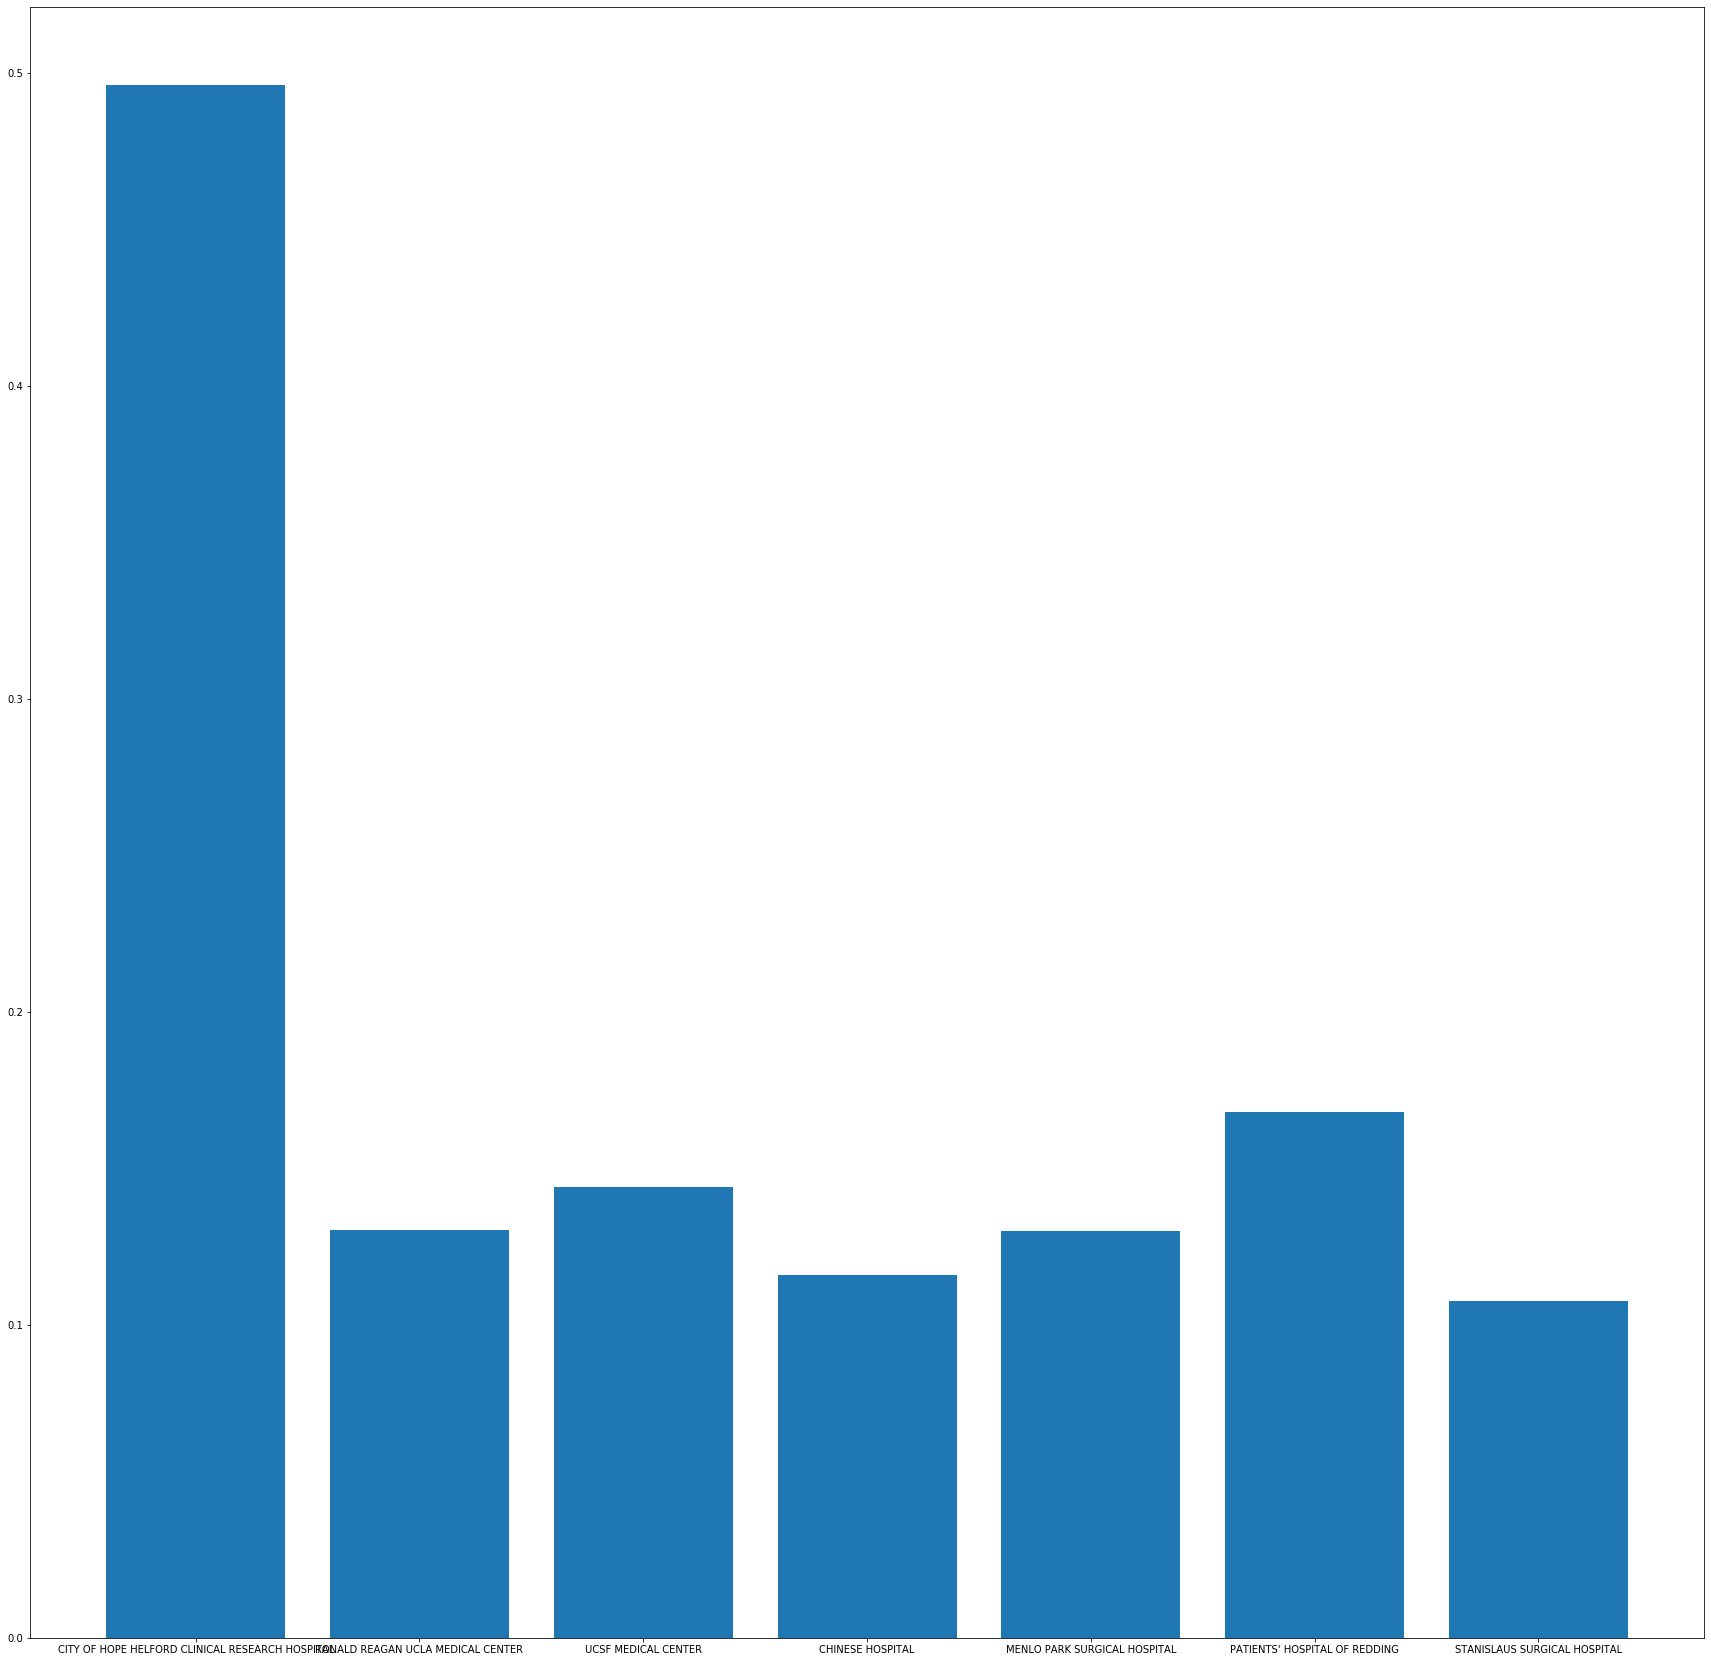

In [52]:
#graph of normalized neoplasm diagnosis
fig,ax = plt.subplots(figsize=[30,30])
temp_norm = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>0.1]["normalized_count"]
temp_facility = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>0.1]["Facility Name"]
ax.bar(temp_facility, temp_norm)

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<BarContainer object of 133 artists>

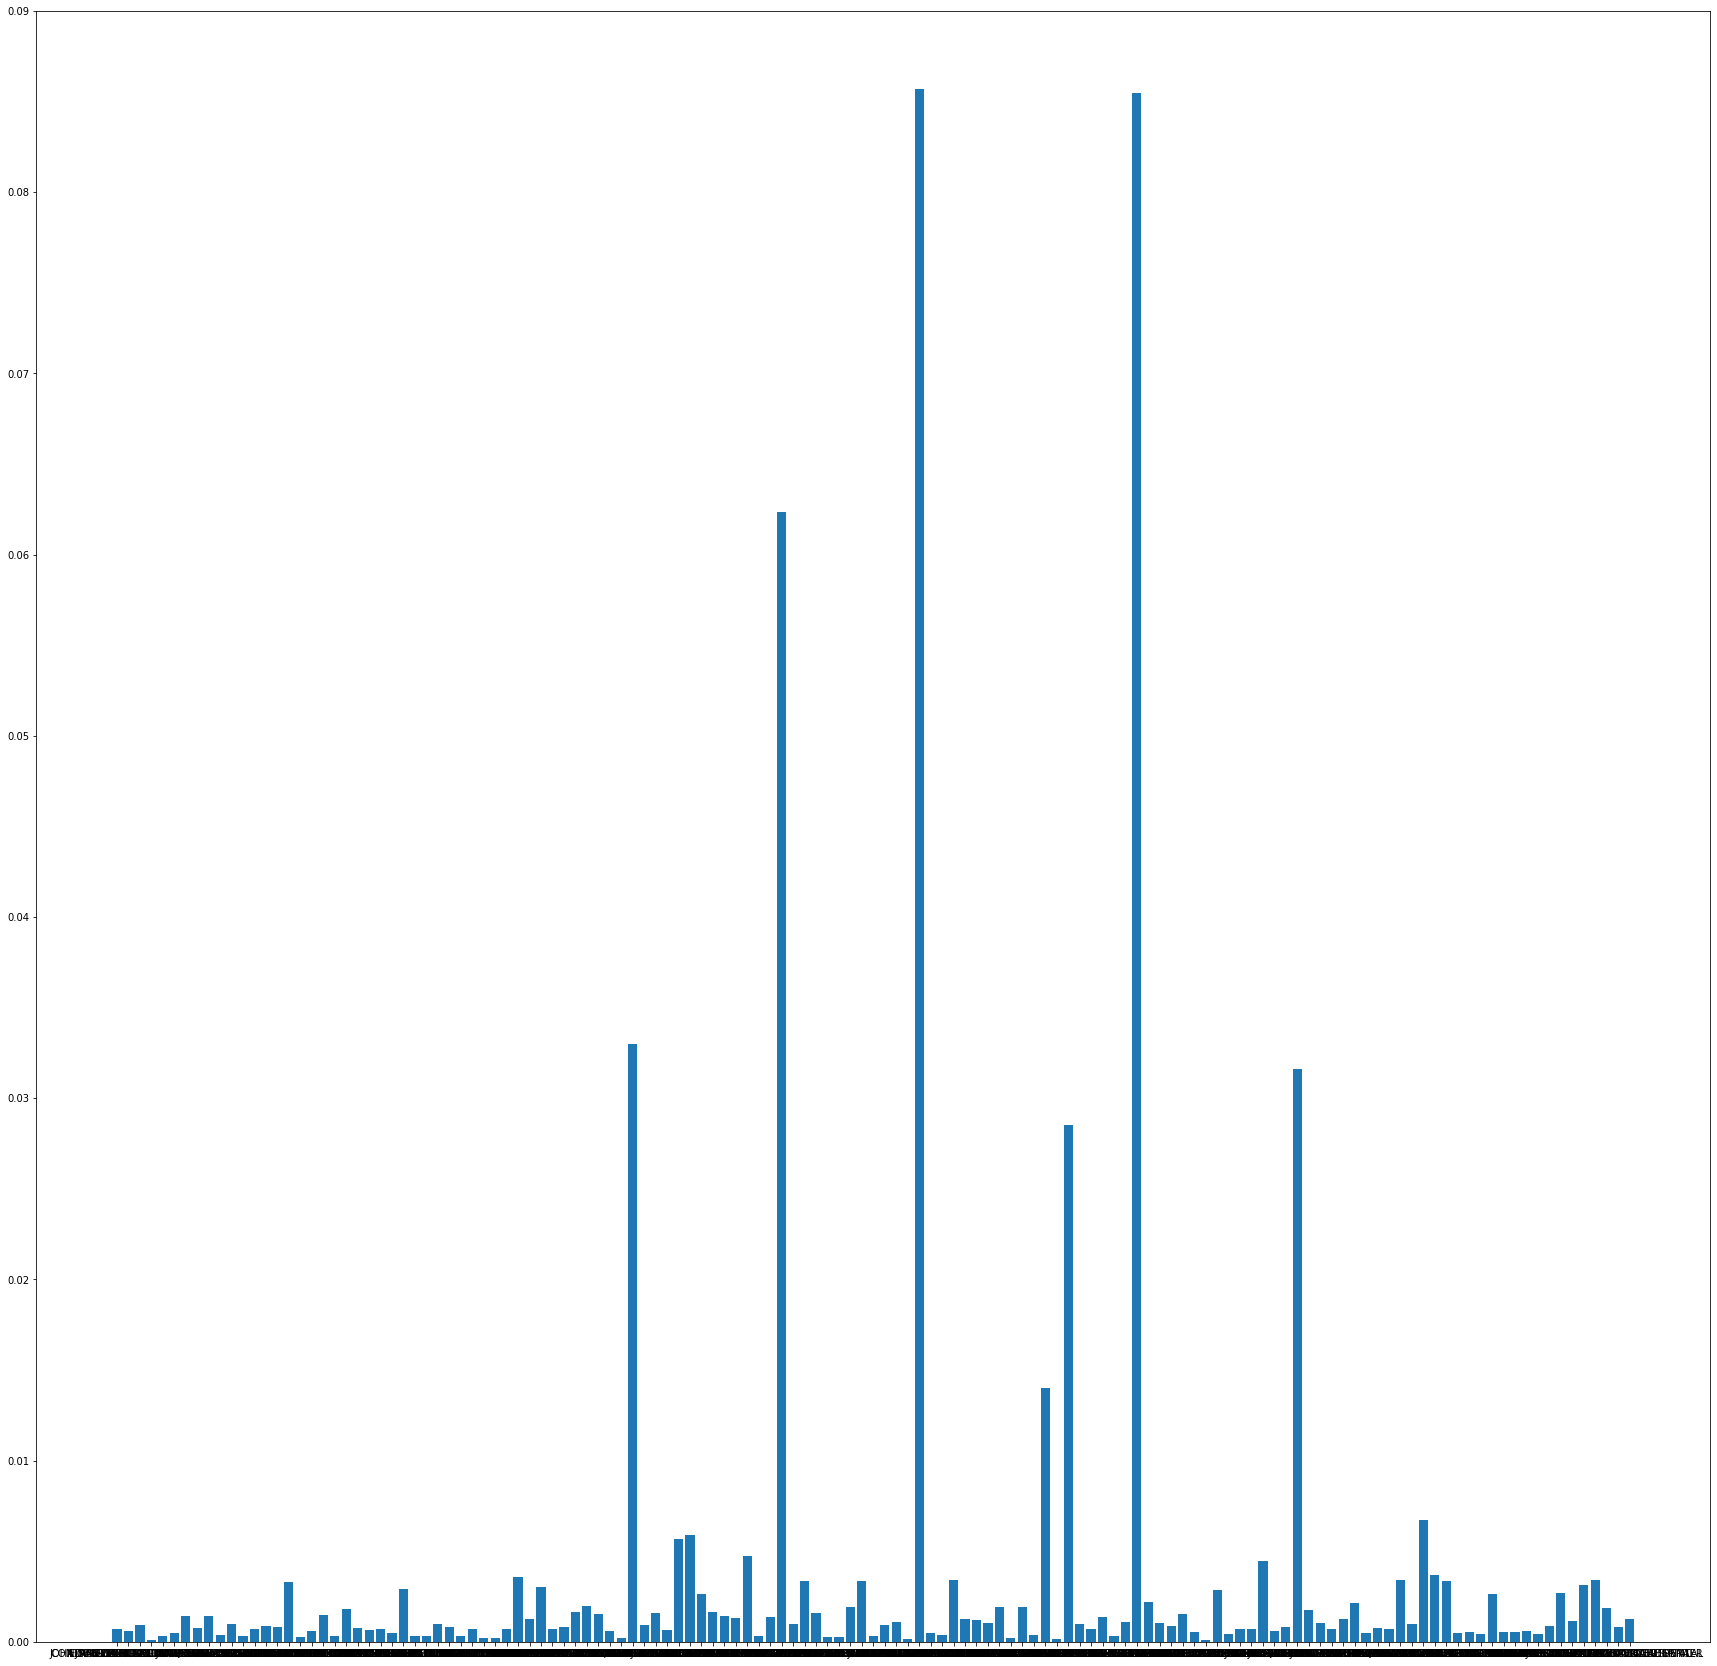

In [53]:
#graph of normalized birth defect diagnosis
fig,ax = plt.subplots(figsize=[30,30])
temp_norm = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"]["normalized_count"]
temp_facility = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"]["Facility Name"]
ax.bar(temp_facility, temp_norm)

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<BarContainer object of 7 artists>

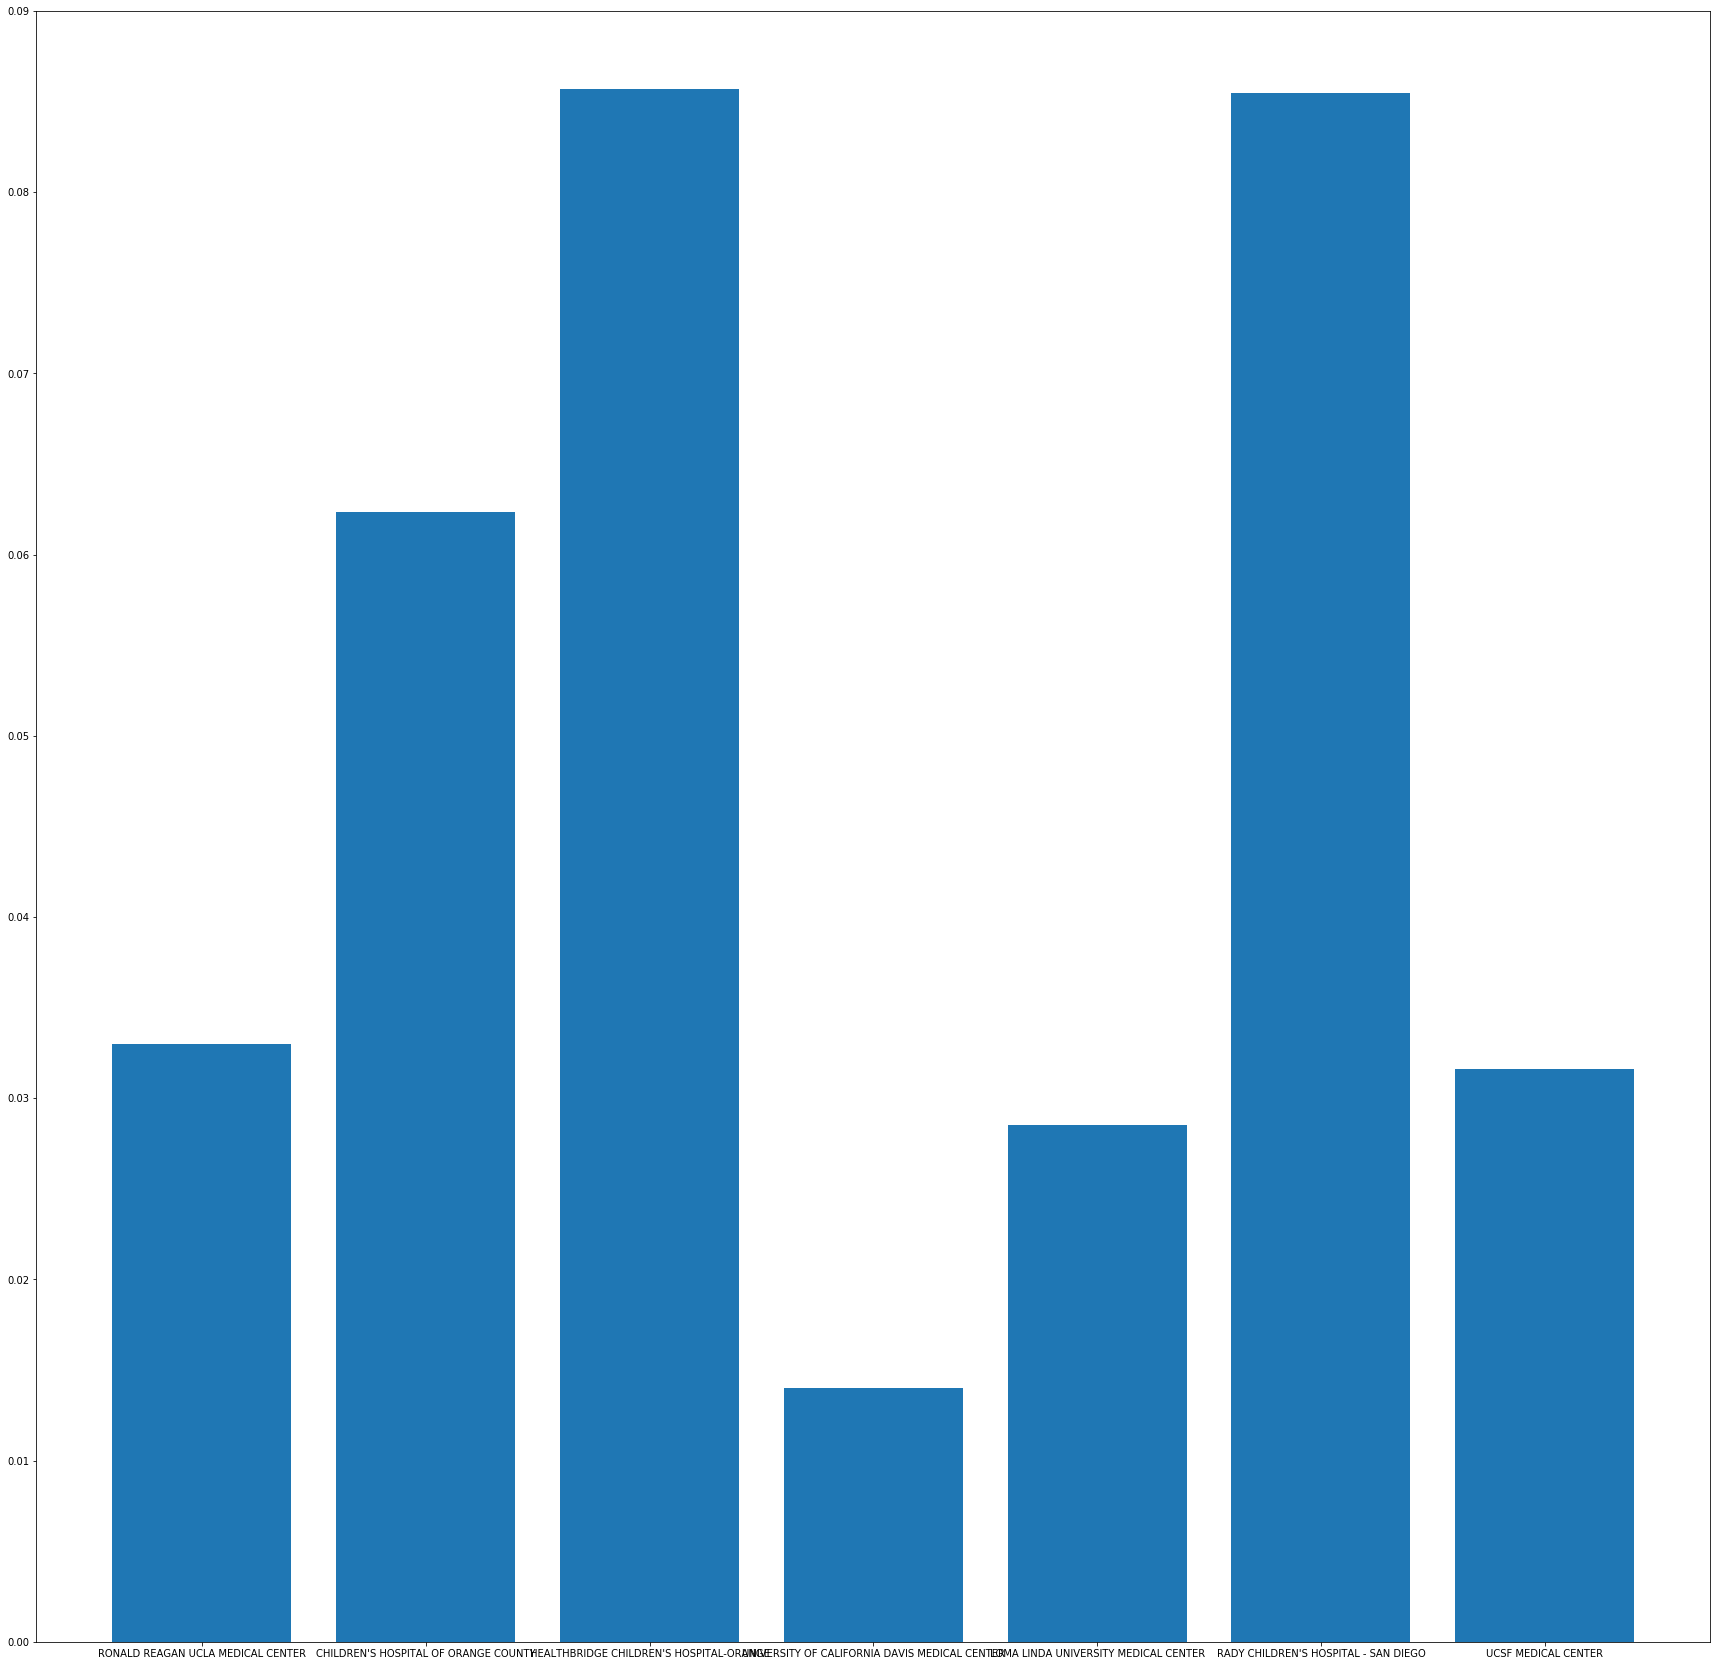

In [54]:
#graph of normalized neoplasm diagnosis
fig,ax = plt.subplots(figsize=[30,30])
temp_norm = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"][filtered["normalized_count"]>.01]["normalized_count"]
temp_facility = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"][filtered["normalized_count"]>.01]["Facility Name"]
ax.bar(temp_facility, temp_norm)

In [55]:
filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>0.1]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                                    Facility Name  \
3951   2009    190176  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
6973   2009    190796                RONALD REAGAN UCLA MEDICAL CENTER   
15492  2009    381154                              UCSF MEDICAL CENTER   
15606  2009    382715                                 CHINESE HOSPITAL   
16925  2009    414018                     MENLO PARK SURGICAL HOSPITAL   
17965  2009    454013                    PATIENTS' HOSPITAL OF REDDING   
18896  2009    504038                     STANISLAUS SURGICAL HOSPITAL   

      Type of Control    County Name Principal Diagnosis Group  Count  \
3951       Non-Profit    LOS ANGELES                 Neoplasms   3147   
6973               UC    LOS ANGELES                 Neoplasms   3201   
15492              UC  SAN FRANCISCO                 Neoplasms   4405   
15606      Non-Profit  SAN FRANCISCO                 Neoplasms    237   
16925      Non-Profit      SAN MATEO                 Neoplasms     60   
17965        Investor         SHASTA                 Neoplasms     64   
18896        Investor     STANISLAUS                 Neoplasms    121   

                                    lowercase_facility   Latitude   Longitude  \
3951   city of hope helford clinical research hospital  34.127777 -117.972443   
6973                 ronald reagan ucla medical center  34.066216 -118.445316   
15492                              ucsf medical center  37.763106 -122.457822   
15606                                 chinese hospital  37.795670 -122.409177   
16925                     menlo park surgical hospital  37.462183 -122.159368   
17965                    patients' hospital of redding  40.585941 -122.416679   
18896                     stanislaus surgical hospital  37.664726 -120.958382   

       normalized_count  
3951           0.496294  
6973           0.130429  
15492          0.144204  
15606          0.116006  
16925          0.129870  
17965          0.167979  
18896          0.107651

In [56]:
#City of hope helford cilinical research hospital is the leading cancer hospital, so it is an outlier

In [57]:
filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Congenital Anomalies (Birth Defects)"][filtered["normalized_count"]>0.02]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                            Facility Name  \
6982   2009    190796        RONALD REAGAN UCLA MEDICAL CENTER   
8933   2009    300032     CHILDREN'S HOSPITAL OF ORANGE COUNTY   
10561  2009    304159  HEALTHBRIDGE CHILDREN'S HOSPITAL-ORANGE   
12736  2009    361246     LOMA LINDA UNIVERSITY MEDICAL CENTER   
13777  2009    370673     RADY CHILDREN'S HOSPITAL - SAN DIEGO   
15504  2009    381154                      UCSF MEDICAL CENTER   

      Type of Control     County Name             Principal Diagnosis Group  \
6982               UC     LOS ANGELES  Congenital Anomalies (Birth Defects)   
8933       Non-Profit          ORANGE  Congenital Anomalies (Birth Defects)   
10561        Investor          ORANGE  Congenital Anomalies (Birth Defects)   
12736      Non-Profit  SAN BERNARDINO  Congenital Anomalies (Birth Defects)   
13777      Non-Profit       SAN DIEGO  Congenital Anomalies (Birth Defects)   
15504              UC   SAN FRANCISCO  Congenital Anomalies (Birth Defects)   

       Count                       lowercase_facility   Latitude   Longitude  \
6982     809        ronald reagan ucla medical center  34.066216 -118.445316   
8933     779     children's hospital of orange county  33.780739 -117.865466   
10561      6  healthbridge children's hospital-orange  33.782799 -117.833923   
12736    943     loma linda university medical center  34.049137 -117.261172   
13777   1256     rady children's hospital - san diego  32.797589 -117.150832   
15504    966                      ucsf medical center  37.763106 -122.457822   

       normalized_count  
6982           0.032964  
8933           0.062340  
10561          0.085714  
12736          0.028536  
13777          0.085483  
15504          0.031623

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


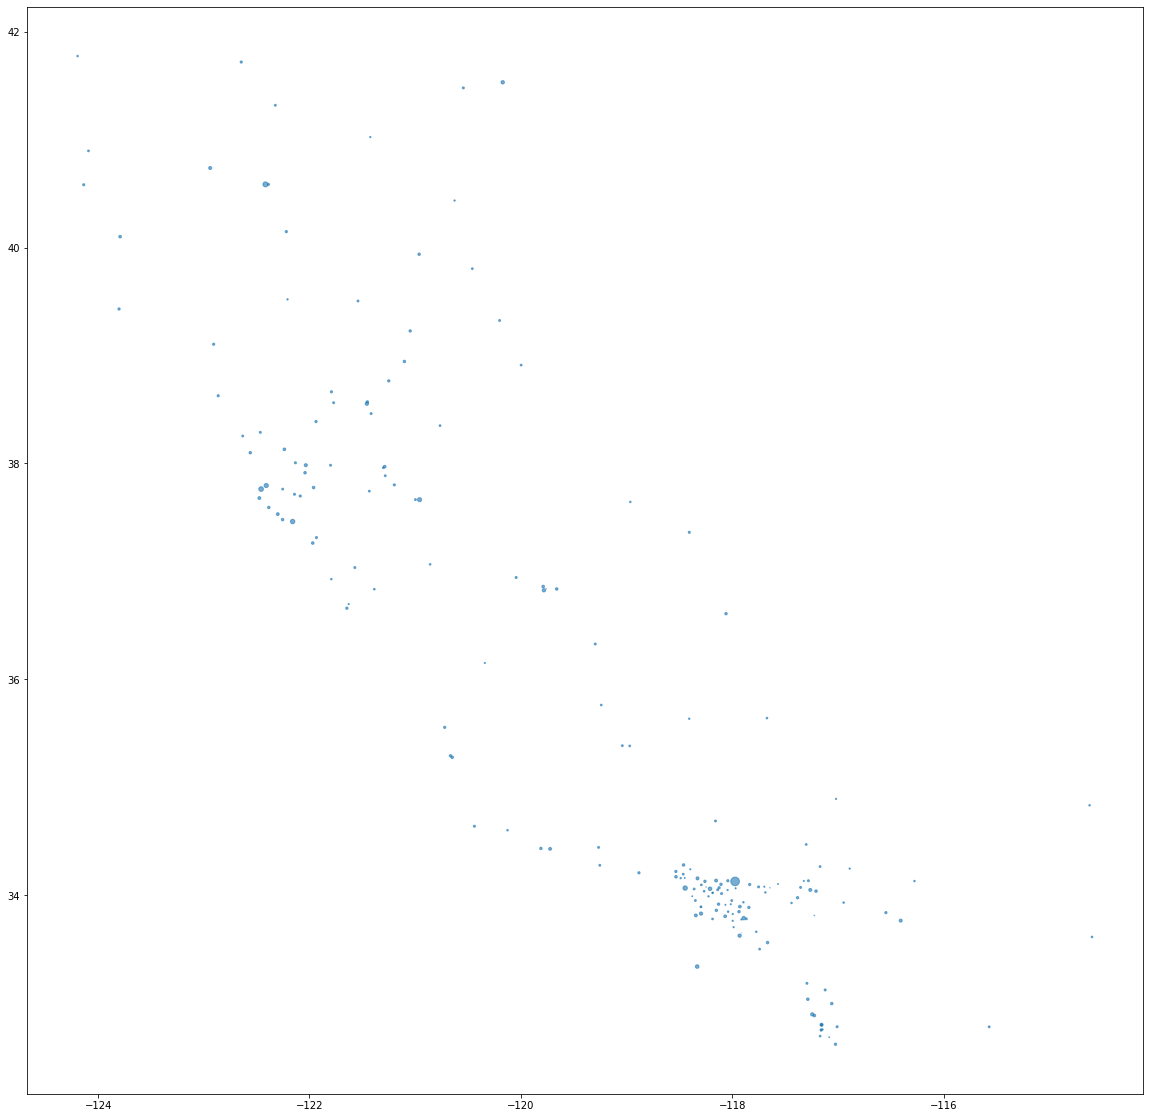

In [58]:
#grpah of location of hospitals with size based on normalized count of neoplasms
fig,ax = plt.subplots(figsize=[20,20])
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha=0.6)

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


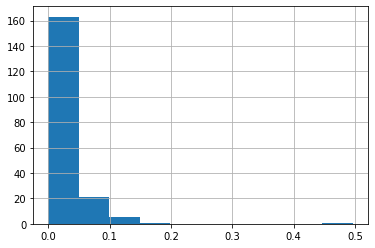

In [59]:

temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]
temp["normalized_count"].hist()

In [60]:
#as we can see above the normalized count of neoplasm diagnosis is a poisson distribution

In [61]:
temp = temp.drop([3951])

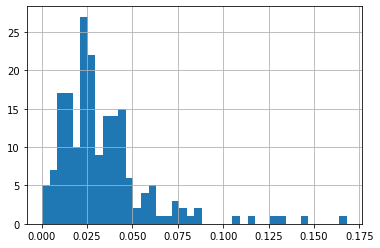

In [62]:
temp["normalized_count"].hist(bins=40)
#after removing the outlier it more closely approximates a binomial

In [63]:
stats.poisson.rvs(mu=1.5,size=10)

array([2, 2, 2, 0, 1, 1, 1, 2, 1, 2])

In [64]:
filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                         Facility Name Type of Control  \
1      2009     10735                      ALAMEDA HOSPITAL        District   
101    2009     10805                   EDEN MEDICAL CENTER      Non-Profit   
287    2009     13619                  SAN LEANDRO HOSPITAL      Non-Profit   
388    2009     34002                SUTTER AMADOR HOSPITAL      Non-Profit   
497    2009     40937                     OROVILLE HOSPITAL      Non-Profit   
...     ...       ...                                   ...             ...   
19283  2009    560481         VENTURA COUNTY MEDICAL CENTER     City/County   
19397  2009    560492  LOS ROBLES HOSPITAL & MEDICAL CENTER        Investor   
19511  2009    560501        OJAI VALLEY COMMUNITY HOSPITAL      Non-Profit   
19606  2009    571086            WOODLAND MEMORIAL HOSPITAL      Non-Profit   
19719  2009    574010                 SUTTER DAVIS HOSPITAL      Non-Profit   

      County Name Principal Diagnosis Group  Count  \
1         ALAMEDA                 Neoplasms     68   
101       ALAMEDA                 Neoplasms    325   
287       ALAMEDA                 Neoplasms    121   
388        AMADOR                 Neoplasms     58   
497         BUTTE                 Neoplasms    250   
...           ...                       ...    ...   
19283     VENTURA                 Neoplasms    417   
19397     VENTURA                 Neoplasms    531   
19511     VENTURA                 Neoplasms     27   
19606        YOLO                 Neoplasms    160   
19719        YOLO                 Neoplasms    128   

                         lowercase_facility   Latitude   Longitude  \
1                          alameda hospital  37.762657 -122.253899   
101                     eden medical center  37.698380 -122.087393   
287                    san leandro hospital  37.714568 -122.141884   
388                  sutter amador hospital  38.350727 -120.764679   
497                       oroville hospital  39.505405 -121.541008   
...                                     ...        ...         ...   
19283         ventura county medical center  34.277264 -119.252989   
19397  los robles hospital & medical center  34.207592 -118.882400   
19511        ojai valley community hospital  34.442879 -119.264465   
19606            woodland memorial hospital  38.664040 -121.792152   
19719                 sutter davis hospital  38.562824 -121.771301   

       normalized_count  
1              0.023927  
101            0.032185  
287            0.028653  
388            0.021821  
497            0.026548  
...                 ...  
19283          0.024695  
19397          0.034724  
19511          0.025352  
19606          0.033389  
19719          0.027182  

[191 rows x 11 columns]

In [65]:
#stat, p_val = stats.ttest_ind(male_ctr, female_ctr, equal_var=False)

In [66]:
total_by_diagnosis.sum()

11336018

In [67]:
def create_total_counts(df_sub):
    df_sub['total_year_count'] = (df_sub['Count'].sum())
    return df_sub

filtered = filtered.groupby(['Year','Facility Name']).apply(create_total_counts)
filtered.iloc[1]

Year                                     2009
OSHPD ID                                10735
Facility Name                ALAMEDA HOSPITAL
Type of Control                      District
County Name                           ALAMEDA
Principal Diagnosis Group           Neoplasms
Count                                      68
lowercase_facility           alameda hospital
Latitude                              37.7627
Longitude                            -122.254
normalized_count                    0.0239268
total_year_count                         2842
Name: 1, dtype: object

In [68]:
binomial = stats.binom(1000, normalized_total_diagnosis_rate["Neoplasms"])

Text(0.5, 1.0, '# of neoplasm diagnosis under the Null Hypothesis (state wide rate)')

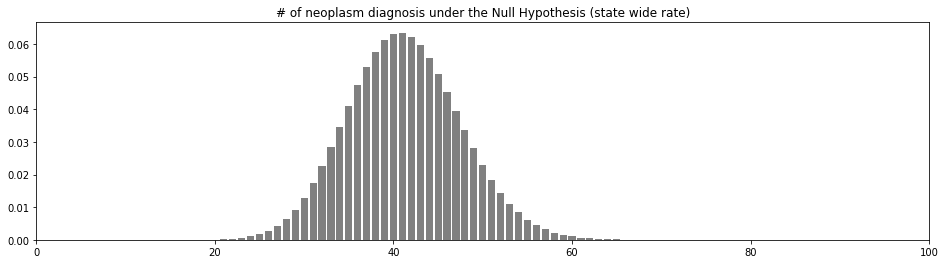

In [69]:
# a patient is either diagnosed with neoplasms or not, so a binomial situation

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(1000), [binomial.pmf(i) for i in range(1000)], 
              align="center", color="grey")
ax.set_xlim(0, 100)
ax.set_title("# of neoplasm diagnosis under the Null Hypothesis (state wide rate)")

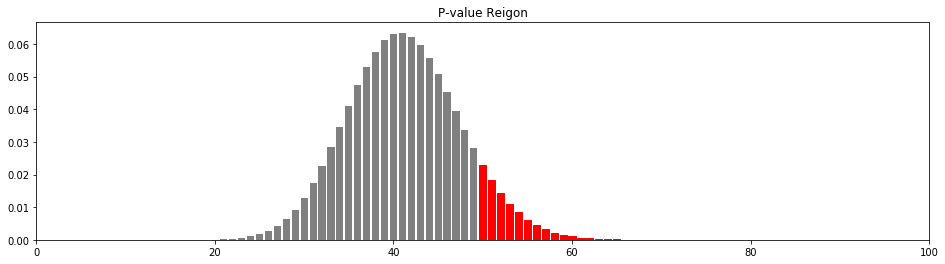

In [70]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(1000), 
              [binomial.pmf(i) for i in range(1000)], 
              color="grey", align="center")
ax.set_xlim(0, 100)

for i in range(50, 100):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [71]:
# binom of the average rate of neoplasm diagnosis state wide
binomial = stats.binom(1000, normalized_total_diagnosis_rate["Neoplasms"])

prob_equal_or_more_extreme = 1 - binomial.cdf(50)
print("Probability of Observing Data Equal or More Extreme than Actual: {:2.6}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data Equal or More Extreme than Actual: 0.0728999


In [72]:
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"]

temp = temp*1000

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [73]:
high_values = pd.DataFrame(temp)

high_values["random chance"]=1-binomial.cdf(temp)

In [74]:
high_values[high_values["random chance"]<.005]

normalized_count  random chance
953           63.942573   4.525613e-04
1625          73.245614   1.517226e-06
3323          85.714286   2.621587e-10
3951         496.293960   1.110223e-16
5409          58.320428   4.426126e-03
6973         130.429468   1.110223e-16
7084          61.202454   1.181342e-03
7535          71.596244   5.325431e-06
7649          85.573161   2.621587e-10
8193          76.923077   2.079453e-07
9297          74.727932   7.930621e-07
9844          81.731869   5.795402e-09
11155         62.230471   7.369008e-04
12003         76.657211   2.079453e-07
12724         61.520305   1.181342e-03
13978         61.039203   1.181342e-03
15080         71.207171   5.325431e-06
15492        144.204013   1.110223e-16
15606        116.005874   1.110223e-16
16925        129.870130   1.110223e-16
17965        167.979003   1.110223e-16
18896        107.651246   1.110223e-16
19074         62.200957   7.369008e-04

In [75]:
#a dataframe with only the hopsitals from 2009 that have a less than .5% chance of having such a high neoplasm disagnosis rate
high_neoplasm_2009 = filtered.iloc[high_values[high_values["random chance"]<.005].index]

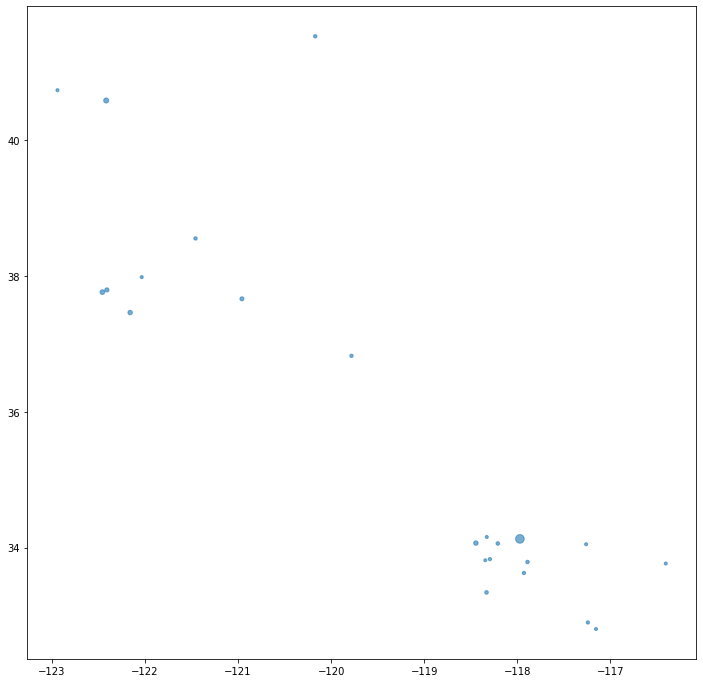

In [76]:
#grpah of location of hospitals with size based on normalized count of neoplasms
fig,ax = plt.subplots(figsize=[12,12])
ax.scatter(high_neoplasm_2009["Longitude"],high_neoplasm_2009["Latitude"],s=150*high_neoplasm_2009["normalized_count"], alpha=0.6)

In [77]:
import geopandas
import geoplot

california = geopandas.read_file(
    "data/ca-state-boundary/CA_State_TIGER2016.shx"
)

river_creek = geopandas.read_file(
    "data/majorriversandcreeks/MajorRiversAndCreeks/MajorRiversAndCreeks.shp"
)

california = california.to_crs({'init': 'epsg:4326'}) # sets it from Mercator to long/lat style projection
river_creek = river_creek.to_crs({'init': 'epsg:4326'}) # sets it from Mercator to long/lat style projection

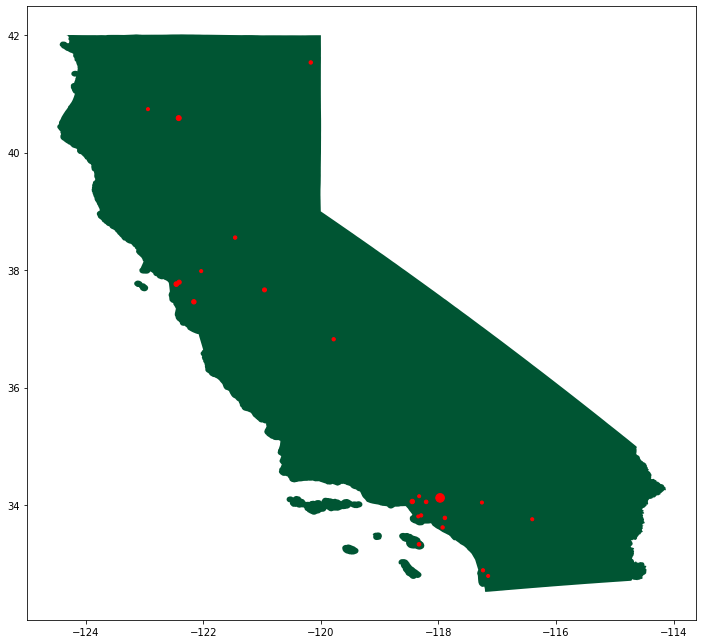

In [78]:

fig,ax = plt.subplots(figsize=[12,12])
california.plot(ax=ax, color="#005533")
#river_creek.plot(ax=ax, color="#9999ee")
ax.scatter(high_neoplasm_2009["Longitude"],high_neoplasm_2009["Latitude"],s=150*high_neoplasm_2009["normalized_count"], color='red')


In [79]:
river_creek.head()

OBJECTID Permanent_       FDate  Resolution   GNIS_ID  \
0         1   84799532  2012-02-21           2  00267488   
1         2   27850084  2018-02-08           2  00250238   
2         3  114915629  2012-02-21           2  00235305   
3         4   33985911  2012-02-20           2  00238156   
4         5   37677303  2012-03-10           2  01654994   

              GNIS_Name  LengthKM       ReachCode  FlowDir WBArea_Per  FType  \
0  South Fork Pit River  0.018000  18020002007344        1       None    336   
1       Talbert Channel  2.777421  18070203000823        1       None    460   
2           Squaw Creek  0.096000  18020115000705        1       None    460   
3           Woods Creek  0.027000  18030010000140        1       None    460   
4            Salt Creek  0.231000  18100204002110        1       None    460   

   FCode  MainPath  InNetwork  Visibility  Enabled  Shape_Leng  \
0  33600         0          1     5000000        1    0.000159   
1  46003         0          1           0        1    0.024863   
2  46006         0          1     5000000        1    0.000889   
3  46006         0          1     5000000        1    0.000271   
4  46003         0          1           0        1    0.002155   

                                            geometry  
0  LINESTRING Z (-120.55223 41.30434 0.00000, -12...  
1  LINESTRING Z (-117.96742 33.70851 0.00000, -11...  
2  LINESTRING Z (-122.48894 39.31517 0.00000, -12...  
3  LINESTRING Z (-118.42568 36.88585 0.00000, -11...  
4  LINESTRING Z (-115.56707 33.57628 0.00000, -11...

In [80]:
### ANALYZING HOSPITALS BY ANALYZING PATIENTS AND DOING A HYPOTHESIS TEST ON THEM COMPARED TO THE REST OF CALIFORNIA OVER TIME

In [81]:
###null hypothesis, the neoplasm diagnosis rate of people in this hospital is the same as the diagnosis rate of people in california as a whole

In [82]:
#varience of all california diagnosis of neoplasm
neoplasm_all_2009_var = np.var(filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2009_mean = np.mean(filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])

neoplasm_all_2010_var = np.var(filtered[filtered["Year"]==2010][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2010_mean = np.mean(filtered[filtered["Year"]==2010][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])

neoplasm_all_2011_var = np.var(filtered[filtered["Year"]==2011][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2011_mean = np.mean(filtered[filtered["Year"]==2011][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])

neoplasm_all_2012_var = np.var(filtered[filtered["Year"]==2012][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2012_mean = np.mean(filtered[filtered["Year"]==2012][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])

neoplasm_all_2013_var = np.var(filtered[filtered["Year"]==2013][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2013_mean = np.mean(filtered[filtered["Year"]==2013][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])

neoplasm_all_2014_var = np.var(filtered[filtered["Year"]==2014][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])
neoplasm_all_2014_mean = np.mean(filtered[filtered["Year"]==2014][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"])


/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to ma

In [83]:
neoplasm_all_CA_means = [neoplasm_all_2009_mean,neoplasm_all_2010_mean,neoplasm_all_2011_mean,neoplasm_all_2012_mean,neoplasm_all_2013_mean,neoplasm_all_2014_mean]

In [84]:
neoplasm_all_CA_means_final = np.mean(neoplasm_all_CA_means)
neoplasm_all_CA_var_final = np.var(neoplasm_all_CA_means)

In [85]:
data_all = np.random.normal(neoplasm_all_CA_means_final, neoplasm_all_CA_var_final, size=1000)

(array([ 17.,  51., 101., 172., 217., 201., 136.,  75.,  23.,   7.]),
 array([0.03435935, 0.03436051, 0.03436168, 0.03436284, 0.034364  ,
        0.03436517, 0.03436633, 0.0343675 , 0.03436866, 0.03436982,
        0.03437099]),
 <a list of 10 Patch objects>)

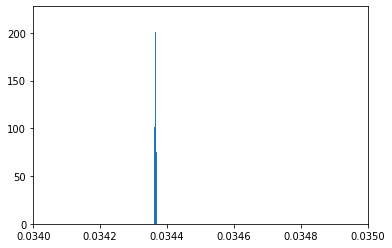

In [86]:
#plot of the change in yearly averages of neoplasm diagnosis for all of california
fig,ax = plt.subplots()
ax.set_xlim(.034,.035)
ax.hist(data_all)

In [87]:
#varience of all california diagnosis of neoplasm
#neoplasm_by_facility_CA_means
mean_of_norm_count = filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"].groupby("Facility Name").mean()["normalized_count"]

var_of_norm_count = filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"].groupby("Facility Name").var()["normalized_count"]


(array([ 17.,  51., 101., 172., 217., 201., 136.,  75.,  23.,   7.]),
 array([0.03435935, 0.03436051, 0.03436168, 0.03436284, 0.034364  ,
        0.03436517, 0.03436633, 0.0343675 , 0.03436866, 0.03436982,
        0.03437099]),
 <a list of 10 Patch objects>)

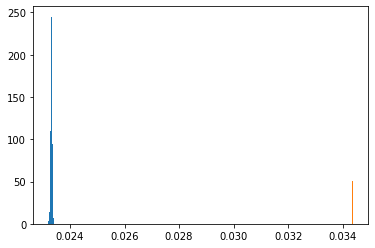

In [88]:

data = np.random.normal(mean_of_norm_count.iloc[1], var_of_norm_count.iloc[1], size=1000)
#plot of the change in yearly averages of neoplasm diagnosis for all of california
fig,ax = plt.subplots()
ax.hist(data)
#plot of the change in yearly averages of neoplasm diagnosis for all of california

ax.hist(data_all)

In [89]:
### SAMPLE SIZES ACROSS YEARS MUCH TOO SMALL


In [90]:
#relavent_diag = ["Blood/Blood-forming Organs","Congenital Anomalies (Birth Defects)","Endocrine/Metabolism",
#                "Genitourinary", "Neoplasms", "Nervous & Sensory Systems"]

relavent_diag = ["Congenital Anomalies (Birth Defects)", "Neoplasms"]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


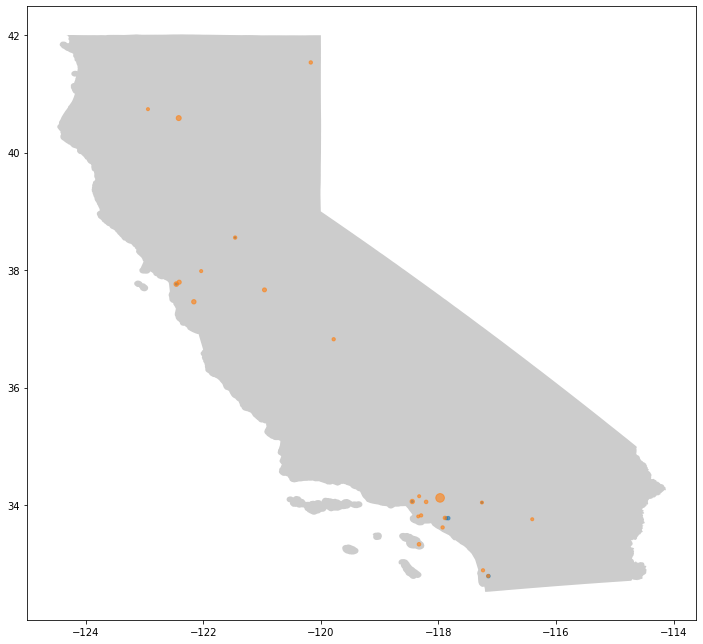

In [91]:
# binom of the average rate of neoplasm diagnosis state wide

fig,ax = plt.subplots(figsize=[12,12])
california.plot(ax=ax, color="#cccccc")
for diag in relavent_diag[:]:
    binomial = stats.binom(1000, normalized_total_diagnosis_rate[diag])

    temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]==diag]["normalized_count"]

    temp = temp*1000
    high_values = pd.DataFrame(temp)

    high_values["random chance"]=1-binomial.cdf(temp)
    high_values[high_values["random chance"]<.005]
    #a dataframe with only the hopsitals from 2009 that have a less than .5% chance of having such a high neoplasm disagnosis rate
    high_diag_2009 = filtered.iloc[high_values[high_values["random chance"]<.005].index]
    #grpah of location of hospitals with size based on normalized count of neoplasms
    ax.scatter(high_diag_2009["Longitude"],high_diag_2009["Latitude"],s=150*high_diag_2009["normalized_count"], alpha = 0.6)


In [92]:
### hypothsis test of individuals in the state for neoplasm diagnosis
### does a sample (a hospitals population) have an unusually high diagnosis rate

In [93]:
normalized_total_diagnosis_rate = total_by_diagnosis / all_diagnosis_total

In [94]:
total_by_diagnosis_2009 = filtered[filtered["Year"]==2009][filtered["OSHPD ID"]!=190176].groupby("Principal Diagnosis Group")["Count"].sum()

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [95]:
all_diagnosis_total_2009 = filtered[filtered["Year"]==2009][filtered["OSHPD ID"]!=190176].groupby("Principal Diagnosis Group")["Count"].sum().sum()

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [96]:
filtered.iloc[839]["total_year_count"]

20020

In [97]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [98]:
california_neoplasms_2009_sample = np.concatenate([np.ones(total_by_diagnosis_2009["Neoplasms"]),np.zeros(all_diagnosis_total_2009-total_by_diagnosis_2009["Neoplasms"])])

In [99]:

hospital_neoplasms_2009_sample = np.concatenate([np.ones(filtered.iloc[839]["Count"]),np.zeros(filtered.iloc[839]["total_year_count"]-filtered.iloc[839]["Count"])])

In [100]:
filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["Year"]==2009][filtered["normalized_count"]>.04]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                                    Facility Name  \
839    2009     70988     JOHN MUIR MEDICAL CENTER-WALNUT CREEK CAMPUS   
953    2009     71018          JOHN MUIR MEDICAL CENTER-CONCORD CAMPUS   
1056   2009     74017                SAN RAMON REGIONAL MEDICAL CENTER   
1396   2009    100005                  CLOVIS COMMUNITY MEDICAL CENTER   
1625   2009    104047                         FRESNO SURGICAL HOSPITAL   
1694   2009    105029               FRESNO HEART AND SURGICAL HOSPITAL   
1991   2009    121031                 JEROLD PHELPS COMMUNITY HOSPITAL   
2401   2009    141338                           SOUTHERN INYO HOSPITAL   
3323   2009    190045                   CATALINA ISLAND MEDICAL CENTER   
3951   2009    190176  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
4447   2009    190240                 LAKEWOOD REGIONAL MEDICAL CENTER   
5181   2009    190385             PROVIDENCE HOLY CROSS MEDICAL CENTER   
5295   2009    190400                     HUNTINGTON MEMORIAL HOSPITAL   
5409   2009    190422                 TORRANCE MEMORIAL MEDICAL CENTER   
5612   2009    190517                PROVIDENCE TARZANA MEDICAL CENTER   
6973   2009    190796                RONALD REAGAN UCLA MEDICAL CENTER   
7084   2009    190758           PROVIDENCE SAINT JOSEPH MEDICAL CENTER   
7535   2009    191227                   LAC/HARBOR-UCLA MEDICAL CENTER   
7649   2009    191228                           LAC+USC MEDICAL CENTER   
7877   2009    214034                        NOVATO COMMUNITY HOSPITAL   
8193   2009    250955               SURPRISE VALLEY COMMUNITY HOSPITAL   
9024   2009    301098             AHMC ANAHEIM REGIONAL MEDICAL CENTER   
9297   2009    301205              HOAG MEMORIAL HOSPITAL PRESBYTERIAN   
9616   2009    301248                      LOS ALAMITOS MEDICAL CENTER   
9730   2009    301262         MISSION HOSPITAL REGIONAL MEDICAL CENTER   
9844   2009    301279   UNIVERSITY OF CALIFORNIA IRVINE MEDICAL CENTER   
10272  2009    301342                          ST. JUDE MEDICAL CENTER   
10624  2009    310791                     SUTTER AUBURN FAITH HOSPITAL   
10937  2009    320986                         PLUMAS DISTRICT HOSPITAL   
11155  2009    331168                        EISENHOWER MEDICAL CENTER   
12003  2009    341006    UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   
12724  2009    361246             LOMA LINDA UNIVERSITY MEDICAL CENTER   
13001  2009    361308                      REDLANDS COMMUNITY HOSPITAL   
13978  2009    370694                          SHARP MEMORIAL HOSPITAL   
14625  2009    370771             SCRIPPS MEMORIAL HOSPITAL - LA JOLLA   
14967  2009    370977                                POMERADO HOSPITAL   
15080  2009    371256                           SCRIPPS GREEN HOSPITAL   
15180  2009    371394            SCRIPPS MEMORIAL HOSPITAL - ENCINITAS   
15492  2009    381154                              UCSF MEDICAL CENTER   
15606  2009    382715                                 CHINESE HOSPITAL   
15812  2009    391042          ST. JOSEPH'S MEDICAL CENTER OF STOCKTON   
16149  2009    400480                   FRENCH HOSPITAL MEDICAL CENTER   
16483  2009    410782                         SAN MATEO MEDICAL CENTER   
16585  2009    410817                             SETON MEDICAL CENTER   
16699  2009    410852                   MILLS-PENINSULA MEDICAL CENTER   
16813  2009    410891                                 SEQUOIA HOSPITAL   
16925  2009    414018                     MENLO PARK SURGICAL HOSPITAL   
16986  2009    420483                   GOLETA VALLEY COTTAGE HOSPITAL   
17198  2009    420514                   SANTA BARBARA COTTAGE HOSPITAL   
17396  2009    430743                     EL CAMINO HOSPITAL LOS GATOS   
17965  2009    454013                    PATIENTS' HOSPITAL OF REDDING   
18245  2009    481094                     SUTTER SOLANO MEDICAL CENTER   
18896  2009    504038                     STANISLAUS SURGICAL HOSPITAL   
19074  2009

In [101]:
np.var(california_neoplasms_2009_sample)

0.039216369697131985

In [102]:
test_statistic = welch_test_statistic(hospital_neoplasms_2009_sample,california__neoplasms_2009_sample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

NameError: name 'california__neoplasms_2009_sample' is not defined

In [103]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [104]:


df = welch_satterhwaithe_df(nick_heights, matt_heights)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))



NameError: name 'nick_heights' is not defined

NameError: name 'df' is not defined

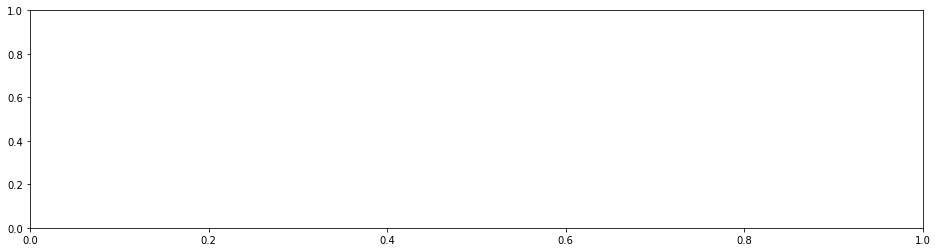

In [105]:
x = np.linspace(-7, 7, num=250)

fig, ax = plt.subplots(1, figsize=(16, 4))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

NameError: name 'df' is not defined

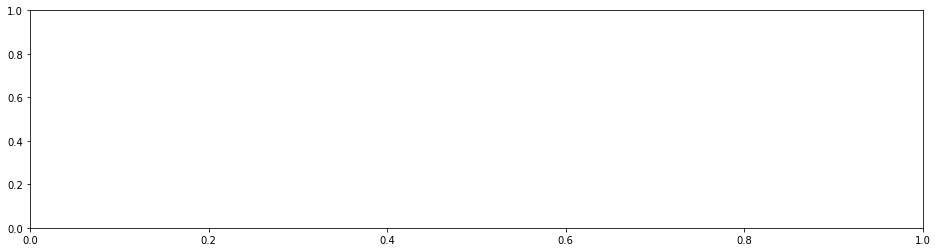

In [106]:
x = np.linspace(-7, 7, num=250)

fig, ax = plt.subplots(1, figsize=(16, 4))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
#_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [107]:
        
        
def list_unlikely_high_diagnosis(diag, year, ignoreIDs=[]):
    temp = filtered[filtered["Year"]==year][filtered["Principal Diagnosis Group"]==diag][~filtered["OSHPD ID"].isin(ignoreIDs)][["OSHPD ID","Count","normalized_count","total_year_count"]]
    
    total_by_diagnosis= filtered[filtered["Year"]==year][~filtered["OSHPD ID"].isin(ignoreIDs)].groupby("Principal Diagnosis Group")["Count"].sum()
    all_diagnosis_total = total_by_diagnosis.sum()
    
    
    california_sample = np.concatenate([np.ones(total_by_diagnosis[diag]),np.zeros(all_diagnosis_total-total_by_diagnosis[diag])])
    result = []
    for index, row in temp.iterrows():
        hospital_sample = np.concatenate([np.ones(int(row["Count"])),np.zeros(int(row["total_year_count"])-int(row["Count"]))])
        res = stats.mannwhitneyu(hospital_sample,california_neoplasms_2009_sample , alternative="greater")
        if res.pvalue < 0.05:
            result.append(row["OSHPD ID"])
            #print(res)
            #print("p-value for hospital < California {}: {:2.3f}".format(row["OSHPD ID"],res.pvalue))
    return result
        

In [108]:
neoplasm_lists = []
for year in range(2009,2015):
    neoplasm_lists.append(list_unlikely_high_diagnosis("Neoplasms",year,[190176]))
    print("finished {}".format(year))

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


finished 2009
finished 2010
finished 2011
finished 2012
finished 2013
finished 2014


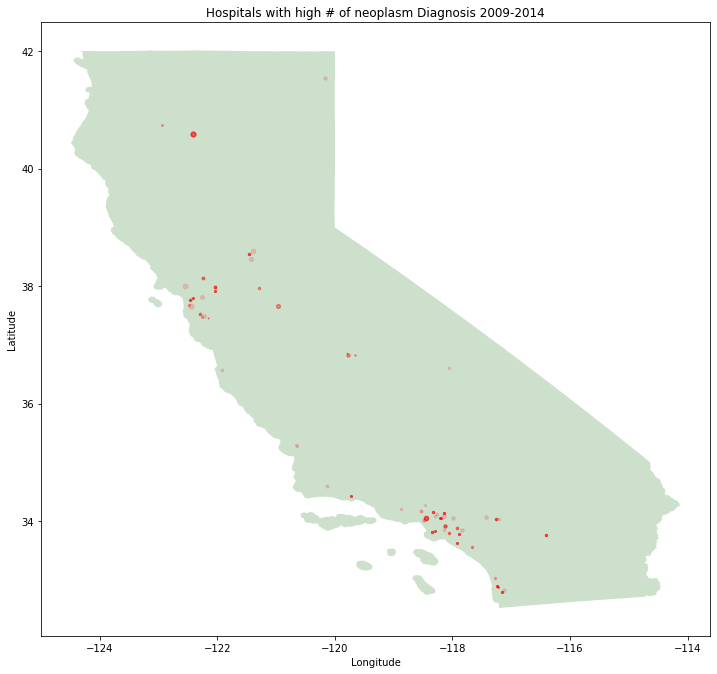

In [109]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospitals with high # of neoplasm Diagnosis 2009-2014')
california.plot(ax=ax, color="#006600", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")
   

In [110]:
birth_defect_lists = []
for year in range(2009,2015):
    birth_defect_lists.append(list_unlikely_high_diagnosis("Congenital Anomalies (Birth Defects)",year,[300032,304159,370673]))
    print("finished {}".format(year))

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


finished 2009
finished 2010
finished 2011
finished 2012
finished 2013
finished 2014


In [147]:

non_children_hospitals=filtered[~filtered["OSHPD ID"].isin(filtered[filtered["Facility Name"].str.contains("kid", case=False) | filtered["Facility Name"].str.contains("child", case=False) | filtered["Facility Name"].str.contains("UC Irvine", case=False)| filtered["Facility Name"].str.contains("UC Davis", case=False)| filtered["Facility Name"].str.contains("Loma linda", case=False)].drop_duplicates(subset=['OSHPD ID'])["OSHPD ID"])].drop_duplicates(subset=['OSHPD ID'])["OSHPD ID"]

In [148]:
birth_defect_lists_children_hospital_only = []
for year in range(2009,2015):
    birth_defect_lists_children_hospital_only.append(list_unlikely_high_diagnosis("Congenital Anomalies (Birth Defects)",year,non_children_hospitals))
    print("finished {}".format(year))

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


finished 2009
finished 2010
finished 2011
finished 2012
finished 2013
finished 2014


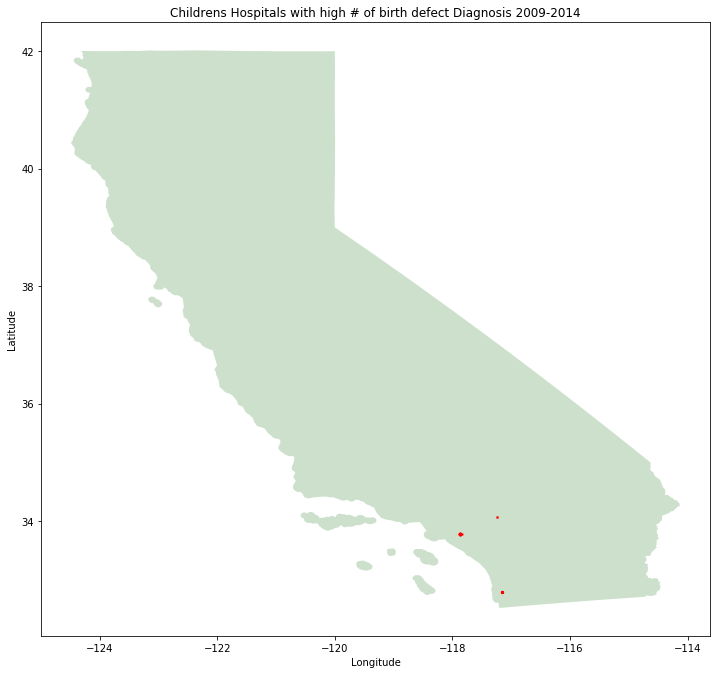

In [149]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Childrens Hospitals with high # of birth defect Diagnosis 2009-2014')
california.plot(ax=ax, color="#006600", alpha = 0.2)
for li in birth_defect_lists_children_hospital_only:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.7, color = "red")
   

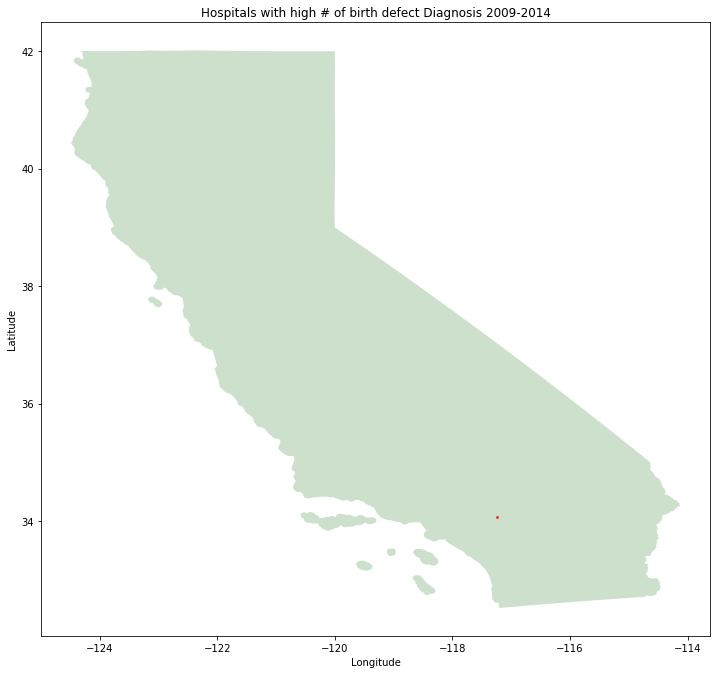

In [112]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospitals with high # of birth defect Diagnosis 2009-2014')
california.plot(ax=ax, color="#006600", alpha = 0.2)
for li in birth_defect_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.7, color = "red")
   

In [113]:

Edocrine_lists = []
for year in range(2009,2015):
    Edocrine_lists.append(list_unlikely_high_diagnosis("Endocrine/Metabolism",year,[]))
    print("finished {}".format(year))

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


finished 2009
finished 2010
finished 2011
finished 2012
finished 2013
finished 2014


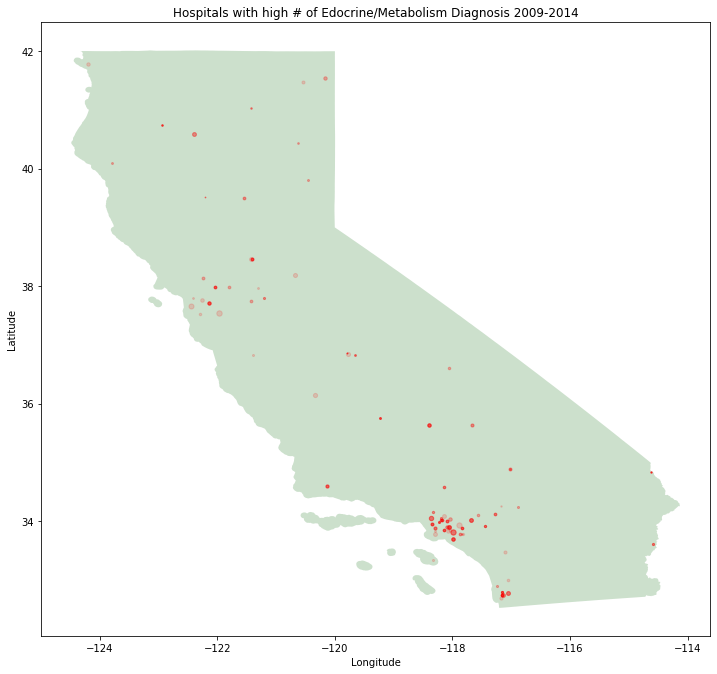

In [114]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospitals with high # of Edocrine/Metabolism Diagnosis 2009-2014')
california.plot(ax=ax, color="#006600", alpha = 0.2)
for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")
   

In [115]:


Nervous_System_lists = []
for year in range(2009,2015):
    Nervous_System_lists.append(list_unlikely_high_diagnosis("Nervous & Sensory Systems",year,[]))
    print("finished {}".format(year))

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


finished 2009
finished 2010
finished 2011
finished 2012
finished 2013
finished 2014


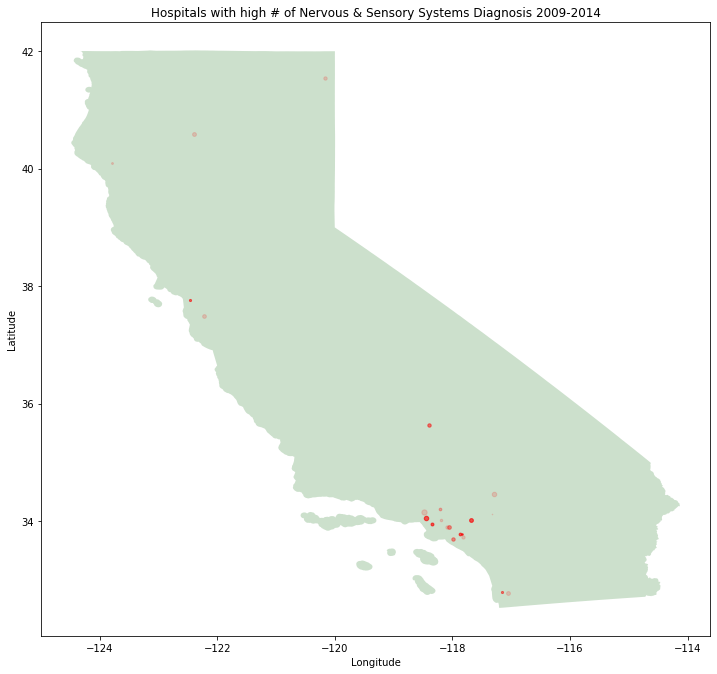

In [116]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospitals with high # of Nervous & Sensory Systems Diagnosis 2009-2014')
california.plot(ax=ax, color="#006600", alpha = 0.2)
for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")
   

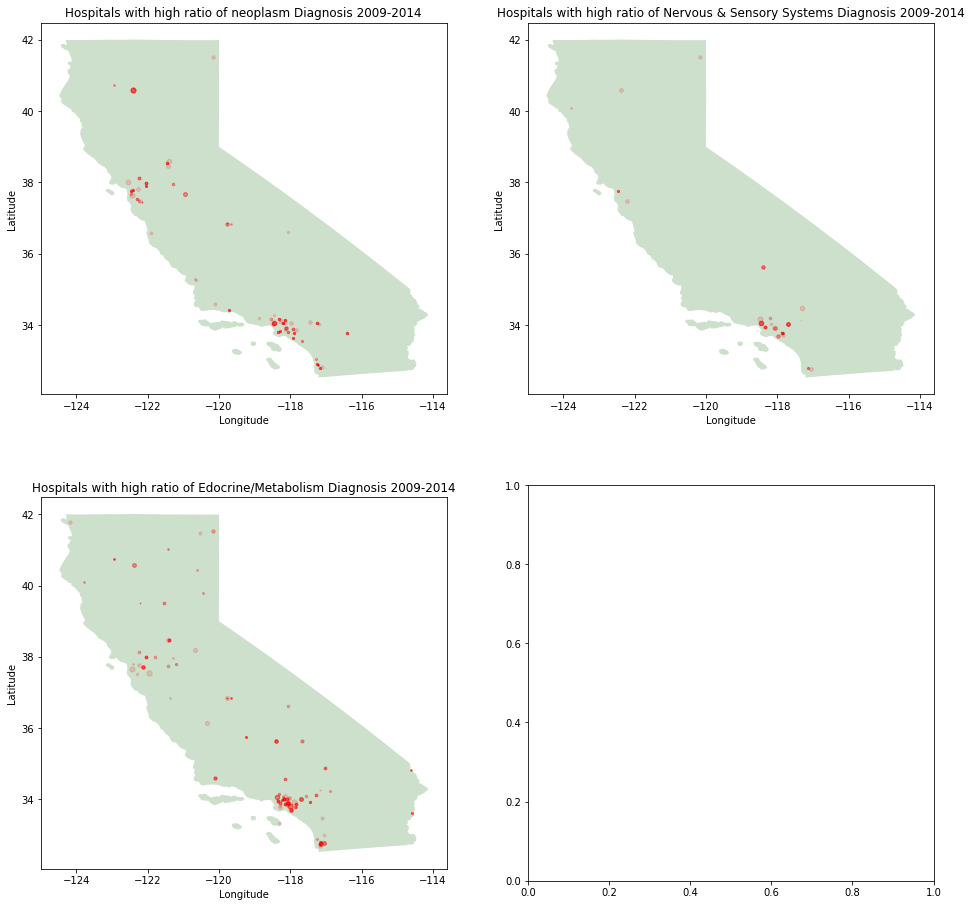

In [117]:
fig,ax = plt.subplots(2,2,figsize=[16,16])


ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_title('Hospitals with high ratio of neoplasm Diagnosis 2009-2014')
california.plot(ax=ax[0,0], color="#006600", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[0,0].scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")

        
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_title('Hospitals with high ratio of Edocrine/Metabolism Diagnosis 2009-2014')
california.plot(ax=ax[1,0], color="#006600", alpha = 0.2)
for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        a=ax[1,0].scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")

        
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_title('Hospitals with high ratio of Nervous & Sensory Systems Diagnosis 2009-2014')
california.plot(ax=ax[0,1], color="#006600", alpha = 0.2)
for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[0,1].scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")

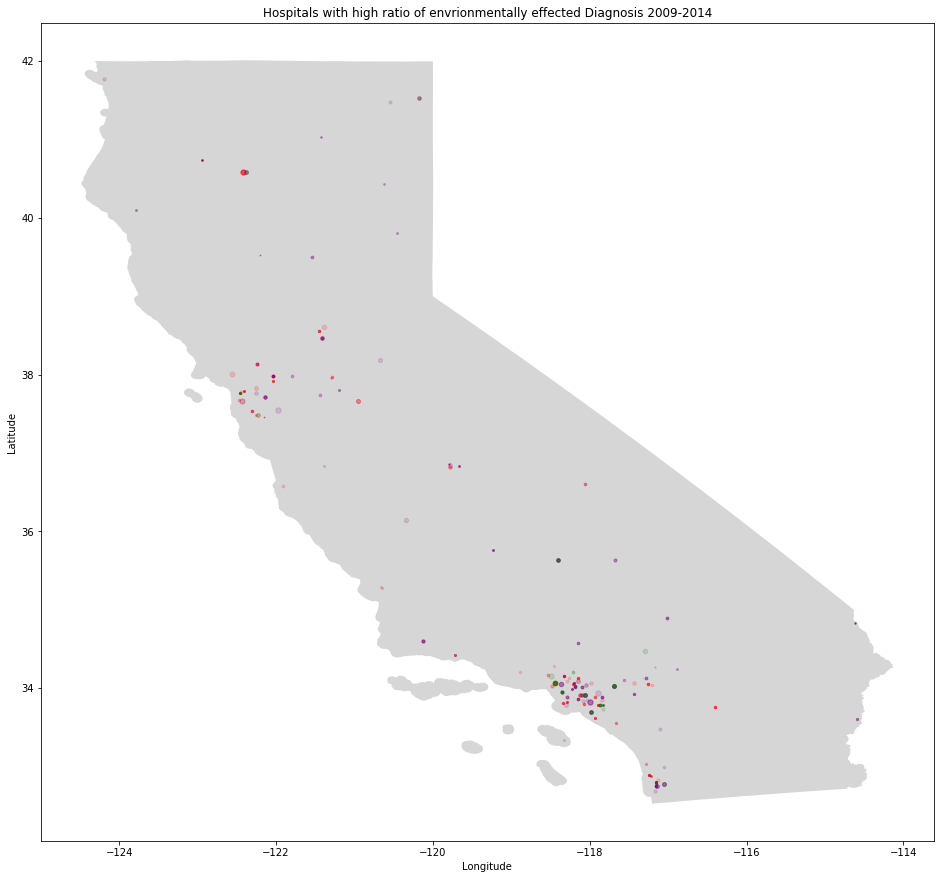

In [118]:
fig,ax = plt.subplots(figsize=[16,16])


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospitals with high ratio of envrionmentally effected Diagnosis 2009-2014')
california.plot(ax=ax, color="#333333", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "red")

for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "purple")

for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha = 0.15, color = "green")

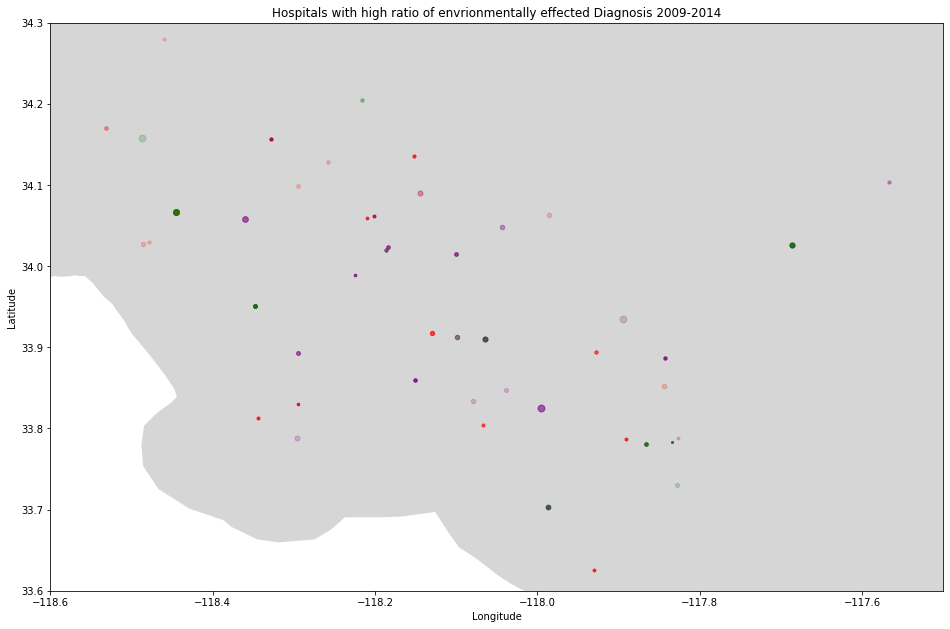

In [119]:
fig,ax = plt.subplots(figsize=[16,16])


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-118.6,-117.5)
ax.set_ylim(33.6,34.3)
ax.set_title('Hospitals with high ratio of envrionmentally effected Diagnosis 2009-2014')
california.plot(ax=ax, color="#333333", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=250*temp["normalized_count"], alpha = 0.2, color = "red")

for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=250*temp["normalized_count"], alpha = 0.2, color = "purple")

for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax.scatter(temp["Longitude"],temp["Latitude"],s=250*temp["normalized_count"], alpha = 0.2, color = "green")

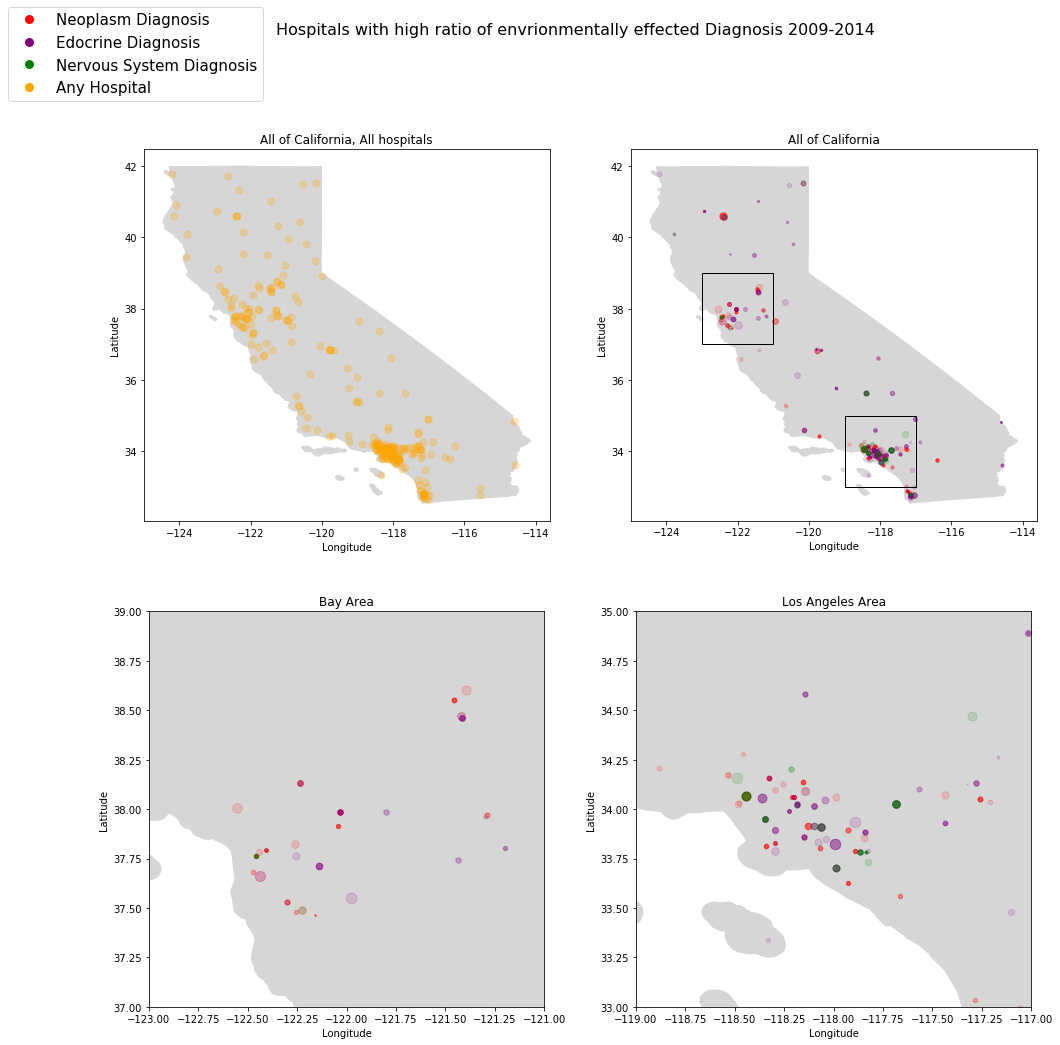

In [198]:
fig,ax = plt.subplots(2,2,figsize=[16,16])

fig.suptitle('Hospitals with high ratio of envrionmentally effected Diagnosis 2009-2014', fontsize=16)
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_ylabel('Latitude')

ax[0,1].set_title('All of California')

california.plot(ax=ax[0,1], color="#333333", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        red=ax[0,1].scatter(temp["Longitude"],temp["Latitude"],s=300*temp["normalized_count"], alpha = 0.15, color = "red")

for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        purple = ax[0,1].scatter(temp["Longitude"],temp["Latitude"],s=300*temp["normalized_count"], alpha = 0.15, color = "purple")

for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        green = ax[0,1].scatter(temp["Longitude"],temp["Latitude"],s=300*temp["normalized_count"], alpha = 0.15, color = "green")
    
# Create a Rectangle patch
rect = mpl.patches.Rectangle((-123,37),2,2,linewidth=1,edgecolor='black',facecolor='none')

# Add the patch to the Axes
ax[0,1].add_patch(rect)


# Create a Rectangle patch
rect = mpl.patches.Rectangle((-119,33),2,2,linewidth=1,edgecolor='black',facecolor='none')

# Add the patch to the Axes
ax[0,1].add_patch(rect)
        
        
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_title('All of California, All hospitals')
california.plot(ax=ax[0,0], color="#333333", alpha = 0.2)
temp = filtered.drop_duplicates(subset=['OSHPD ID'])
ax[0,0].scatter(temp["Longitude"],temp["Latitude"],s=50, alpha = 0.25, color = "orange")

    
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_title('Bay Area')
ax[1,0].set_xlim(-123,-121)
ax[1,0].set_ylim(37,39)
california.plot(ax=ax[1,0], color="#333333", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,0].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "red")

for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,0].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "purple")

for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,0].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "green")
        
        
        
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_title('Los Angeles Area')
ax[1,1].set_xlim(-119,-117)
ax[1,1].set_ylim(33,35)
california.plot(ax=ax[1,1], color="#333333", alpha = 0.2)
for li in neoplasm_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,1].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "red")

for li in Edocrine_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,1].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "purple")

for li in Nervous_System_lists:
    for ids in li:
        temp = filtered[filtered["OSHPD ID"]==ids].drop_duplicates(subset=['OSHPD ID'])
        ax[1,1].scatter(temp["Longitude"],temp["Latitude"],s=600*temp["normalized_count"], alpha = 0.15, color = "green")
        
        

Neoplasm_patch = mpl.lines.Line2D([0], [0], marker='o', color='w', label='Neoplasm Diagnosis',
                          markerfacecolor='red', markersize=10)
Edocrine_patch = mpl.lines.Line2D([0], [0], marker='o', color='w', label='Edocrine Diagnosis',
                          markerfacecolor='purple', markersize=10)
Nervous_patch = mpl.lines.Line2D([0], [0], marker='o', color='w', label='Nervous System Diagnosis',
                          markerfacecolor='green', markersize=10)
neutral_patch = mpl.lines.Line2D([0], [0], marker='o', color='w', label='Any Hospital',
                          markerfacecolor='orange', markersize=10)

fig.legend(handles=[Neoplasm_patch, Edocrine_patch, Nervous_patch, neutral_patch], loc=2, prop={'size':15})
